<a href="https://colab.research.google.com/github/nicha1997/Disseration-Project/blob/main/Dissertation_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Phase 1: Foundational Data Preparation**

## **Step 1.1: Final Data Cleaning & Preprocessing**

In [ ]:
import pandas as pd

# load Excel file
df = pd.read_excel('New Raw Data.xlsx')

# Convert blanks and whitespaces to NaN
df.replace(r'^\s*$', pd.NA, regex=True, inplace=True)

# Check missing values again
missing_count = df.isnull().sum()
missing_percent = (missing_count / len(df)) * 100

missing_summary = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing Percent (%)': missing_percent
})

print("Missing values summary for all columns:")
print(missing_summary)


Missing values summary for all columns:
                              Missing Count  Missing Percent (%)
Company_Ticker                            0             0.000000
Company_Name                              0             0.000000
Country                                   0             0.000000
Revenue_2017                           1290            46.654611
Revenue_2018                           1218            44.050633
...                                     ...                  ...
Cash_Flow_to_Debt_Ratio_2020           1253            45.316456
Cash_Flow_to_Debt_Ratio_2021           1222            44.195298
Cash_Flow_to_Debt_Ratio_2022           1209            43.725136
Cash_Flow_to_Debt_Ratio_2023           1205            43.580470
Cash_Flow_to_Debt_Ratio_2024           1274            46.075949

[188 rows x 2 columns]


In [ ]:
print("Data types of each column:")
print(df.dtypes)


Data types of each column:
Company_Ticker                   object
Company_Name                     object
Country                          object
Revenue_2017                     object
Revenue_2018                     object
                                 ...   
Cash_Flow_to_Debt_Ratio_2020    float64
Cash_Flow_to_Debt_Ratio_2021    float64
Cash_Flow_to_Debt_Ratio_2022    float64
Cash_Flow_to_Debt_Ratio_2023    float64
Cash_Flow_to_Debt_Ratio_2024    float64
Length: 188, dtype: object


In [ ]:
print("Detailed info of the DataFrame:")
df.info()


Detailed info of the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2765 entries, 0 to 2764
Columns: 188 entries, Company_Ticker to Cash_Flow_to_Debt_Ratio_2024
dtypes: float64(32), object(156)
memory usage: 4.0+ MB


In [ ]:
# Define years and Financial indicator names
years = [str(y) for y in range(2017, 2025)]
indicators = ['Revenue', 'GM', 'ROA', 'Curr_Ratio', 'Inv_Turnover', 'Inv_Days',
              'A/R_Trnovr', 'A/P_Turnover_Days', 'Curr_Assets', 'Curr_Liab', 'W/K_Cap', 'Avg_W/K_Cap', 'W/K_Cap_Tur',
              'EBIT', 'Int_Exp', 'Int_Cov_Ratio', 'CFO', 'Tot_Debt', 'Cash_Flow_to_Debt_Ratio']

# To collect complete company-year data (with indicator values)
complete_data_records = []

# Loop over each year
for year in years:
    # Build list of column names for this year
    cols_this_year = [f"{indicator}_{year}" for indicator in indicators]

    # Drop rows with any missing in these columns
    complete_rows = df.dropna(subset=cols_this_year).copy()

    # Add 'Year' column
    complete_rows['Year'] = int(year)

    # Keep only identifying columns + the indicator columns for this year
    selected_cols = ['Company_Ticker', 'Company_Name', 'Year'] + cols_this_year
    complete_data_records.append(complete_rows[selected_cols])

# Combine all complete records
final_complete_df = pd.concat(complete_data_records, ignore_index=True)

# Save to Excel
final_complete_df.to_excel("Financial_Complete_Data.xlsx", index=False)

# Download in Colab
from google.colab import files
files.download("Financial_Complete_Data.xlsx")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Define years and ESG indicator names
years = [str(y) for y in range(2017, 2025)]
esg_indicators = [
    'ESG_Disc_Score', 'Env_Disc_Sc', 'Soc_Disc_Sc', 'Gov_Disc_Sc'
]

# To collect complete (Company, Year) ESG records
complete_esg_data = []

# Loop over each year
for year in years:
    # Generate column names for this year
    cols_this_year = [f"{indicator}_{year}" for indicator in esg_indicators]

    # Drop rows with any missing ESG data for this year
    complete_rows = df.dropna(subset=cols_this_year).copy()

    # Add Year column
    complete_rows["Year"] = int(year)

    # Keep only identifier + that year's ESG columns
    selected_cols = ['Company_Ticker', 'Company_Name', 'Year'] + cols_this_year
    complete_esg_data.append(complete_rows[selected_cols])

# Combine all complete ESG rows
final_esg_df = pd.concat(complete_esg_data, ignore_index=True)

# Export to Excel
final_esg_df.to_excel("ESG_Complete_Data.xlsx", index=False)

# Download file in Colab
from google.colab import files
files.download("ESG_Complete_Data.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import numpy as np

# Load data
financial_df = pd.read_excel("Financial_Complete_Data.xlsx")
raw_df = pd.read_excel('New Raw Data.xlsx')

# Clean blanks
raw_df.replace(r'^\s*$', pd.NA, regex=True, inplace=True)

# Define years and indicators
years = [str(y) for y in range(2017, 2025)]
financial_indicators = ['Revenue', 'GM', 'ROA', 'Curr_Ratio', 'Inv_Turnover', 'Inv_Days',
                        'A/R_Trnovr', 'A/P_Turnover_Days', 'Curr_Assets', 'Curr_Liab', 'W/K_Cap', 'Avg_W/K_Cap', 'W/K_Cap_Tur',
                        'EBIT', 'Int_Exp', 'Int_Cov_Ratio', 'CFO', 'Tot_Debt', 'Cash_Flow_to_Debt_Ratio']
esg_indicators = ['ESG_Disc_Score', 'Env_Disc_Sc', 'Soc_Disc_Sc', 'Gov_Disc_Sc']

# Reshape financial data from wide to long
financial_long = pd.wide_to_long(financial_df,
                                  stubnames=financial_indicators,
                                  i=['Company_Ticker', 'Company_Name', 'Year'],
                                  j='temp_year',
                                  sep='_',
                                  suffix='\\d+').reset_index()

# Drop rows where year mismatch occurred
financial_long = financial_long[financial_long['Year'] == financial_long['temp_year']]
financial_long.drop(columns='temp_year', inplace=True)

# Reshape ESG data
esg_records = []
for year in years:
    cols = [f"{col}_{year}" for col in esg_indicators]
    df_subset = raw_df[['Company_Ticker', 'Company_Name'] + cols].copy()
    df_subset['Year'] = int(year)
    df_subset.rename(columns={f"{col}_{year}": col for col in esg_indicators}, inplace=True)
    esg_records.append(df_subset)

esg_flat = pd.concat(esg_records, ignore_index=True)

# Option 1: Keep only complete Financial & ESG rows
complete_esg = esg_flat.dropna(subset=esg_indicators)
merged_option1 = pd.merge(financial_long, complete_esg, on=['Company_Ticker', 'Company_Name', 'Year'], how='inner')

# Option 2: Keep complete financial, join ESG and add flag columns
merged_option2 = pd.merge(financial_long, esg_flat, on=['Company_Ticker', 'Company_Name', 'Year'], how='left')

# Add binary flags for ESG presence
for col in esg_indicators:
    merged_option2[f"{col}_Flag"] = np.where(merged_option2[col].notna(), 1, 0)

# Export both files
option1_path = "File1_Final_Financial_With_ESG.xlsx"
option2_path = "File2_Final_Financial_With_ESG_Flags.xlsx"
merged_option1.to_excel(option1_path, index=False)
merged_option2.to_excel(option2_path, index=False)

print("Option 1: Financial + ESG")
display(merged_option1)

print("Option 2: Financial + ESG Flags")
display(merged_option2)


Option 1: Financial + ESG


,Company_Ticker,Company_Name,Year,Revenue,GM,ROA,Curr_Ratio,Inv_Turnover,Inv_Days,A/R_Trnovr,...,EBIT,Int_Exp,Int_Cov_Ratio,CFO,Tot_Debt,Cash_Flow_to_Debt_Ratio,ESG_Disc_Score,Env_Disc_Sc,Soc_Disc_Sc,Gov_Disc_Sc
0,2915 TT Equity,RUENTEX INDUSTRIES LTD,2017,3.104367e+10,86.2847,19.5269,1.9317,1.2755,286.1670,113.7925,...,2.501689e+10,288515008.0,86.709151,1.418869e+09,2.688319e+10,0.052779,32.6024,23.2256,12.0617,62.4022
1,LFVN US Equity,LIFEVANTAGE CORP,2017,1.994890e+08,83.2291,3.3464,1.5220,1.6050,227.4213,138.2460,...,4.449000e+06,570000.0,7.805263,6.597000e+06,7.500000e+06,0.879600,31.4958,0,10.006,84.2866
2,4927 JP Equity,POLA ORBIS HOLDINGS INC,2017,2.443350e+11,82.9611,11.2739,3.9747,2.2525,162.0415,8.8378,...,3.888100e+10,69000000.0,563.492775,3.533300e+10,3.744000e+09,9.437233,59.0987,58.653,53.9601,64.6598
3,HLF US Equity,HERBALIFE LTD,2017,4.427700e+09,80.8343,7.8344,2.0515,2.3820,153.2303,54.1284,...,6.171000e+08,160800000.0,3.837687,5.908000e+08,2.268100e+09,0.260482,44.5126,20.1148,28.295,84.9789
4,EL US Equity,ESTEE LAUDER COMPANIES-CL A,2017,1.182400e+10,79.3894,12.0148,1.7584,1.7769,205.4155,8.9137,...,1.692000e+09,103000000.0,16.427184,1.800000e+09,3.572000e+09,0.503919,54.1797,50.8004,26.6324,84.9789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3794,9267 JP Equity,GENKY DRUGSTORES CO LTD,2024,1.848600e+11,20.3511,5.7530,0.9140,6.3304,57.8162,42.9408,...,9.015000e+09,103000000.0,87.524272,1.325600e+10,3.064800e+10,0.432524,30.9627,0,13.9964,78.7176
3795,1375 JP Equity,YUKIGUNI FACTORY CO LTD,2024,4.747600e+10,24.4671,3.8088,1.1441,8.4396,43.3668,18.9336,...,2.811000e+09,534000000.0,5.264045,5.322000e+09,1.861200e+10,0.285945,55.0951,47.9915,33.5852,83.5942
3796,4936 JP Equity,AXXZIA INC,2024,1.219238e+10,78.8243,7.4781,5.1233,1.2878,284.1995,12.8347,...,9.183440e+08,8079000.0,113.670504,8.003570e+08,9.755580e+08,0.820409,27.6632,2.4162,9.8549,70.5599
3797,KITW LN Equity,KITWAVE GROUP PLC,2024,6.636520e+08,22.2737,5.8776,1.0123,12.4059,29.5020,10.8909,...,2.880400e+07,6191000.0,4.652560,2.528200e+07,1.013170e+08,0.249534,37.964,22.8934,7.2249,83.5942


Option 2: Financial + ESG Flags


,Company_Ticker,Company_Name,Year,Revenue,GM,ROA,Curr_Ratio,Inv_Turnover,Inv_Days,A/R_Trnovr,...,Tot_Debt,Cash_Flow_to_Debt_Ratio,ESG_Disc_Score,Env_Disc_Sc,Soc_Disc_Sc,Gov_Disc_Sc,ESG_Disc_Score_Flag,Env_Disc_Sc_Flag,Soc_Disc_Sc_Flag,Gov_Disc_Sc_Flag
0,202 HK Equity,EVERCHINA INTL HOLDINGS CO L,2017,6.795100e+07,95.7249,1.7625,2.4122,415.0000,0.8795,1.1010,...,1.043893e+09,0.266208,<NA>,<NA>,<NA>,<NA>,0,0,0,0
1,233990 KS Equity,JILGYUNGYI CO LTD,2017,2.055577e+10,93.6801,-16.1825,0.7345,2.4436,149.3725,27.3224,...,5.361500e+09,-0.115259,<NA>,<NA>,<NA>,<NA>,0,0,0,0
2,2915 TT Equity,RUENTEX INDUSTRIES LTD,2017,3.104367e+10,86.2847,19.5269,1.9317,1.2755,286.1670,113.7925,...,2.688319e+10,0.052779,32.6024,23.2256,12.0617,62.4022,1,1,1,1
3,LFVN US Equity,LIFEVANTAGE CORP,2017,1.994890e+08,83.2291,3.3464,1.5220,1.6050,227.4213,138.2460,...,7.500000e+06,0.879600,31.4958,0,10.006,84.2866,1,1,1,1
4,4927 JP Equity,POLA ORBIS HOLDINGS INC,2017,2.443350e+11,82.9611,11.2739,3.9747,2.2525,162.0415,8.8378,...,3.744000e+09,9.437233,59.0987,58.653,53.9601,64.6598,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8199,GTII CN Equity,GREEN THUMB INDUSTRIES INC,2024,1.137141e+09,52.8614,2.9076,2.4483,4.1212,88.8084,23.7384,...,5.307000e+08,0.367784,<NA>,<NA>,<NA>,<NA>,0,0,0,0
8200,ALAVI FP Equity,ADVINI,2024,2.775510e+08,36.0046,0.0646,0.8704,1.4590,250.8631,11.7954,...,1.912000e+08,0.111564,<NA>,<NA>,<NA>,<NA>,0,0,0,0
8201,OLVAS FH Equity,OLVI OYJ-A SHARES,2024,6.569070e+08,40.5584,11.9792,1.3508,5.1912,70.5036,5.7193,...,1.049900e+07,8.203353,<NA>,<NA>,<NA>,<NA>,0,0,0,0
8202,451250 KS Equity,BBIA CO,2024,5.764475e+10,59.4680,1.4746,6.9002,2.6210,139.6409,15.6397,...,1.719373e+09,-0.570331,<NA>,<NA>,<NA>,<NA>,0,0,0,0


In [ ]:
from google.colab import files
files.download("File1_Final_Financial_With_ESG.xlsx")
files.download("File2_Final_Financial_With_ESG_Flags.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
# Load Excel files into pandas DataFrames
df1 = pd.read_excel("File1_Final_Financial_With_ESG.xlsx")
df2 = pd.read_excel("File2_Final_Financial_With_ESG_Flags.xlsx")

# Display a full summary for File 1
print("--- Data Summary for File 1 ---")
df1.info()

print("\n" + "="*40 + "\n") # Separator

# Display a full summary for File 2
print("--- Data Summary for File 2 ---")
df2.info()

--- Data Summary for File 1 ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3799 entries, 0 to 3798
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Company_Ticker           3799 non-null   object 
 1   Company_Name             3799 non-null   object 
 2   Year                     3799 non-null   int64  
 3   Revenue                  3799 non-null   int64  
 4   GM                       3799 non-null   float64
 5   ROA                      3799 non-null   float64
 6   Curr_Ratio               3799 non-null   float64
 7   Inv_Turnover             3799 non-null   float64
 8   Inv_Days                 3799 non-null   float64
 9   A/R_Trnovr               3799 non-null   float64
 10  A/P_Turnover_Days        3799 non-null   float64
 11  Curr_Assets              3799 non-null   int64  
 12  Curr_Liab                3799 non-null   int64  
 13  W/K_Cap                  3799 non-null   float

## **Step 1.2: Define and Justify the Risk Threshold**

In [ ]:
# Define your risk threshold
threshold = 0.15

# Create the 'Risk_Category' column for both DataFrames
# 1 represents 'High Risk', 0 represents 'Low Risk'
df1['Risk_Category'] = (df1['Cash_Flow_to_Debt_Ratio'] < threshold).astype(int)
df2['Risk_Category'] = (df2['Cash_Flow_to_Debt_Ratio'] < threshold).astype(int)

# Check the distribution for File 1
print("--- Risk Distribution for File 1 ---")
print(df1['Risk_Category'].value_counts(normalize=True) * 100)
print("\n") # Separator

# Check the distribution for File 2
print("--- Risk Distribution for File 2 ---")
print(df2['Risk_Category'].value_counts(normalize=True) * 100)

--- Risk Distribution for File 1 ---
Risk_Category
0    73.624638
1    26.375362
Name: proportion, dtype: float64


--- Risk Distribution for File 2 ---
Risk_Category
0    63.274013
1    36.725987
Name: proportion, dtype: float64


In [ ]:
# Display all column names for File 1
print("--- Columns in File 1 ---")
print(df1.columns.tolist())
display(df1.head())

print("\n" + "="*40 + "\n") # Separator

# Display all column names for File 2
print("--- Columns in File 2 ---")
print(df2.columns.tolist())
display(df2.head())

--- Columns in File 1 ---
['Company_Ticker', 'Company_Name', 'Year', 'Revenue', 'GM', 'ROA', 'Curr_Ratio', 'Inv_Turnover', 'Inv_Days', 'A/R_Trnovr', 'A/P_Turnover_Days', 'Curr_Assets', 'Curr_Liab', 'W/K_Cap', 'Avg_W/K_Cap', 'W/K_Cap_Tur', 'EBIT', 'Int_Exp', 'Int_Cov_Ratio', 'CFO', 'Tot_Debt', 'Cash_Flow_to_Debt_Ratio', 'ESG_Disc_Score', 'Env_Disc_Sc', 'Soc_Disc_Sc', 'Gov_Disc_Sc', 'Risk_Category']


,Company_Ticker,Company_Name,Year,Revenue,GM,ROA,Curr_Ratio,Inv_Turnover,Inv_Days,A/R_Trnovr,...,Int_Exp,Int_Cov_Ratio,CFO,Tot_Debt,Cash_Flow_to_Debt_Ratio,ESG_Disc_Score,Env_Disc_Sc,Soc_Disc_Sc,Gov_Disc_Sc,Risk_Category
0,2915 TT Equity,RUENTEX INDUSTRIES LTD,2017,31043674112,86.2847,19.5269,1.9317,1.2755,286.1670,113.7925,...,288515008.0,86.709151,1418868992,26883188736,0.052779,32.6024,23.2256,12.0617,62.4022,1
1,LFVN US Equity,LIFEVANTAGE CORP,2017,199488992,83.2291,3.3464,1.5220,1.6050,227.4213,138.2460,...,570000.0,7.805263,6597000,7500000,0.879600,31.4958,0.0000,10.0060,84.2866,0
2,4927 JP Equity,POLA ORBIS HOLDINGS INC,2017,244335001600,82.9611,11.2739,3.9747,2.2525,162.0415,8.8378,...,69000000.0,563.492775,35333001216,3744000000,9.437233,59.0987,58.6530,53.9601,64.6598,0
3,HLF US Equity,HERBALIFE LTD,2017,4427700224,80.8343,7.8344,2.0515,2.3820,153.2303,54.1284,...,160800000.0,3.837687,590800000,2268100096,0.260482,44.5126,20.1148,28.2950,84.9789,0
4,EL US Equity,ESTEE LAUDER COMPANIES-CL A,2017,11824000000,79.3894,12.0148,1.7584,1.7769,205.4155,8.9137,...,103000000.0,16.427184,1800000000,3572000000,0.503919,54.1797,50.8004,26.6324,84.9789,0




--- Columns in File 2 ---
['Company_Ticker', 'Company_Name', 'Year', 'Revenue', 'GM', 'ROA', 'Curr_Ratio', 'Inv_Turnover', 'Inv_Days', 'A/R_Trnovr', 'A/P_Turnover_Days', 'Curr_Assets', 'Curr_Liab', 'W/K_Cap', 'Avg_W/K_Cap', 'W/K_Cap_Tur', 'EBIT', 'Int_Exp', 'Int_Cov_Ratio', 'CFO', 'Tot_Debt', 'Cash_Flow_to_Debt_Ratio', 'ESG_Disc_Score', 'Env_Disc_Sc', 'Soc_Disc_Sc', 'Gov_Disc_Sc', 'ESG_Disc_Score_Flag', 'Env_Disc_Sc_Flag', 'Soc_Disc_Sc_Flag', 'Gov_Disc_Sc_Flag', 'Risk_Category']


,Company_Ticker,Company_Name,Year,Revenue,GM,ROA,Curr_Ratio,Inv_Turnover,Inv_Days,A/R_Trnovr,...,Cash_Flow_to_Debt_Ratio,ESG_Disc_Score,Env_Disc_Sc,Soc_Disc_Sc,Gov_Disc_Sc,ESG_Disc_Score_Flag,Env_Disc_Sc_Flag,Soc_Disc_Sc_Flag,Gov_Disc_Sc_Flag,Risk_Category
0,202 HK Equity,EVERCHINA INTL HOLDINGS CO L,2017,6.795100e+07,95.7249,1.7625,2.4122,415.0000,0.8795,1.1010,...,0.266208,NaN,NaN,NaN,NaN,0,0,0,0,0
1,233990 KS Equity,JILGYUNGYI CO LTD,2017,2.055577e+10,93.6801,-16.1825,0.7345,2.4436,149.3725,27.3224,...,-0.115259,NaN,NaN,NaN,NaN,0,0,0,0,1
2,2915 TT Equity,RUENTEX INDUSTRIES LTD,2017,3.104367e+10,86.2847,19.5269,1.9317,1.2755,286.1670,113.7925,...,0.052779,32.6024,23.2256,12.0617,62.4022,1,1,1,1,1
3,LFVN US Equity,LIFEVANTAGE CORP,2017,1.994890e+08,83.2291,3.3464,1.5220,1.6050,227.4213,138.2460,...,0.879600,31.4958,0.0000,10.0060,84.2866,1,1,1,1,0
4,4927 JP Equity,POLA ORBIS HOLDINGS INC,2017,2.443350e+11,82.9611,11.2739,3.9747,2.2525,162.0415,8.8378,...,9.437233,59.0987,58.6530,53.9601,64.6598,1,1,1,1,0


In [ ]:
import pandas as pd
from google.colab import files

# Assume df1 and df2 are already loaded and have the 'Risk_Category' column

# 1. Check the data types for both files
print("--- Data Summary for File 1 ---")
df1.info()
print("\n" + "="*40 + "\n")
print("--- Data Summary for File 2 ---")
df2.info()
print("\n" + "="*40 + "\n")

# 2. Define new filenames for the updated files
new_filename1 = "File1_with_Risk_Category.xlsx"
new_filename2 = "File2_with_Risk_Category.xlsx"

# 3. Save the DataFrames to new Excel files
# index=False prevents writing the row numbers into the file
print(f"Saving {new_filename1}...")
df1.to_excel(new_filename1, index=False)

print(f"Saving {new_filename2}...")
df2.to_excel(new_filename2, index=False)

# 4. Download the newly created files to your computer
print("\nStarting file downloads...")
files.download(new_filename1)
files.download(new_filename2)

print("Downloads initiated.")

--- Data Summary for File 1 ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3799 entries, 0 to 3798
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Company_Ticker           3799 non-null   object 
 1   Company_Name             3799 non-null   object 
 2   Year                     3799 non-null   int64  
 3   Revenue                  3799 non-null   int64  
 4   GM                       3799 non-null   float64
 5   ROA                      3799 non-null   float64
 6   Curr_Ratio               3799 non-null   float64
 7   Inv_Turnover             3799 non-null   float64
 8   Inv_Days                 3799 non-null   float64
 9   A/R_Trnovr               3799 non-null   float64
 10  A/P_Turnover_Days        3799 non-null   float64
 11  Curr_Assets              3799 non-null   int64  
 12  Curr_Liab                3799 non-null   int64  
 13  W/K_Cap                  3799 non-null   float

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Downloads initiated.


## **Step 1.3: Exploratory Data Analysis (EDA)**

### **1. Descriptive Statistics**

In [ ]:
import pandas as pd

# Load the two Excel files
df1_final = pd.read_excel("File1_with_Risk_Category.xlsx")
df2_final = pd.read_excel("File2_with_Risk_Category.xlsx")

# Descriptive Statistics for File 1
print("--- Descriptive Statistics for File 1 ---")
# .describe() calculates the key stats for all numerical columns
summary_stats_df1 = df1_final.describe()
display(summary_stats_df1)

# Descriptive Statistics for File 2
print("\n--- Descriptive Statistics for File 2 ---")
summary_stats_df2 = df2_final.describe()
display(summary_stats_df2)

--- Descriptive Statistics for File 1 ---


,Year,Revenue,GM,ROA,Curr_Ratio,Inv_Turnover,Inv_Days,A/R_Trnovr,A/P_Turnover_Days,Curr_Assets,...,Int_Exp,Int_Cov_Ratio,CFO,Tot_Debt,Cash_Flow_to_Debt_Ratio,ESG_Disc_Score,Env_Disc_Sc,Soc_Disc_Sc,Gov_Disc_Sc,Risk_Category
count,3799.000000,3.799000e+03,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3.799000e+03,...,3.799000e+03,3.799000e+03,3.799000e+03,3.799000e+03,3799.000000,3799.00000,3799.000000,3799.000000,3799.000000,3799.000000
mean,2020.280863,5.183375e+11,30.661748,3.403807,1.780002,9.809000,90.778294,54.747972,54.591189,2.019526e+11,...,4.717752e+09,8.650665e+02,3.889000e+10,1.646168e+11,10.817038,40.74864,26.934633,22.878013,72.312215,0.263754
std,2.037130,2.204658e+12,17.186686,9.959485,1.316206,12.156586,228.312017,422.060235,108.034452,9.196501e+11,...,3.763177e+10,3.547276e+04,1.997172e+11,9.660064e+11,234.266599,14.84514,23.247950,14.058890,14.712803,0.440725
min,2017.000000,6.311000e+06,-120.882000,-198.059800,0.049200,0.036100,2.510600,0.147800,2.535700,4.232000e+06,...,3.000000e+03,-8.607133e+03,-8.657661e+11,2.600000e+04,-227.812500,5.16040,0.000000,0.000000,4.997000,0.000000
25%,2019.000000,1.971447e+09,18.446600,1.681950,0.989250,3.995400,34.482850,7.089900,28.258250,7.629990e+08,...,1.010000e+07,3.579582e+00,8.467100e+07,4.007410e+08,0.141521,28.25675,1.902700,11.547800,61.017500,0.000000
50%,2020.000000,1.929350e+10,27.841300,3.930500,1.411200,6.504300,56.116600,10.643200,42.508300,7.024958e+09,...,6.590000e+07,1.097826e+01,1.096819e+09,3.662190e+09,0.297348,39.12080,24.252500,19.226100,73.720600,0.000000
75%,2022.000000,1.629560e+11,39.734750,6.607800,2.131150,10.591250,91.424900,20.274950,63.475300,4.518629e+10,...,2.965095e+08,4.246822e+01,8.034764e+09,2.077908e+10,0.630707,52.21810,46.209600,31.423800,84.286600,1.000000
max,2024.000000,3.007951e+13,86.284700,76.401100,14.690000,145.381200,10111.538100,20109.279300,5294.852500,1.547694e+13,...,8.329340e+11,2.165682e+06,3.802324e+12,1.237531e+13,11301.999616,79.99200,89.217800,80.532000,100.000000,1.000000



--- Descriptive Statistics for File 2 ---


,Year,Revenue,GM,ROA,Curr_Ratio,Inv_Turnover,Inv_Days,A/R_Trnovr,A/P_Turnover_Days,Curr_Assets,...,Cash_Flow_to_Debt_Ratio,ESG_Disc_Score,Env_Disc_Sc,Soc_Disc_Sc,Gov_Disc_Sc,ESG_Disc_Score_Flag,Env_Disc_Sc_Flag,Soc_Disc_Sc_Flag,Gov_Disc_Sc_Flag,Risk_Category
count,8204.000000,8.204000e+03,8204.000000,8204.000000,8204.000000,8204.000000,8204.000000,8204.000000,8204.000000,8.204000e+03,...,8204.000000,3799.00000,3799.000000,3799.000000,3799.000000,8204.000000,8204.000000,8204.000000,8204.000000,8204.000000
mean,2020.661994,3.466606e+11,29.695969,-1.342453,1.936820,31.392573,121.097132,139.950667,69.757748,1.359778e+11,...,6.271486,40.74864,26.934633,22.878013,72.312215,0.463067,0.463067,0.463067,0.463067,0.367260
std,2.254926,1.739508e+12,20.309315,57.420974,1.775757,1549.744485,682.787499,5258.998204,289.433393,7.146449e+11,...,168.802386,14.84514,23.247950,14.058890,14.712803,0.498664,0.498664,0.498664,0.498664,0.482088
min,2017.000000,6.455000e+03,-357.858100,-3896.649200,0.009900,0.007100,0.002600,0.054000,0.031200,3.680000e+04,...,-1279.338097,5.16040,0.000000,0.000000,4.997000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2019.000000,6.196257e+08,17.161725,0.398075,0.978250,3.377050,36.864650,6.463875,27.057825,3.325815e+08,...,0.058572,28.25675,1.902700,11.547800,61.017500,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2021.000000,1.009243e+10,26.912900,3.255250,1.442750,5.836800,62.556650,9.642300,41.539450,3.916886e+09,...,0.244407,39.12080,24.252500,19.226100,73.720600,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2023.000000,8.629248e+10,39.702550,6.393275,2.247300,9.912075,108.273975,16.591625,64.250600,3.086600e+10,...,0.596593,52.21810,46.209600,31.423800,84.286600,1.000000,1.000000,1.000000,1.000000,1.000000
max,2024.000000,3.007951e+13,97.845900,433.318900,39.820500,138992.156300,51692.296900,360039.281300,11617.344700,1.547694e+13,...,11301.999616,79.99200,89.217800,80.532000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Format the table for File 1
print("--- Table 1: Descriptive Statistics for File 1 (with Quartiles) ---")

# 1. Get the descriptive statistics and transpose it
stats_table1 = df1_final.describe().T

# 2. Select the columns you need, including the quartiles
stats_table1 = stats_table1[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]

# 3. Rename the columns to match the desired format
stats_table1 = stats_table1.rename(columns={
    'count': 'Obs',
    'mean': 'Mean',
    'std': 'Std.Dev.',
    'min': 'Min',
    '25%': 'Q1 (25%)',
    '50%': 'Median (50%)',
    '75%': 'Q3 (75%)',
    'max': 'Max'
})

# Display the final table, formatted to two decimal places
display(stats_table1.style.format("{:.2f}"))

# Format the table for File 2
print("\n--- Table 2: Descriptive Statistics for File 2 (with Quartiles) ---")
stats_table2 = df2_final.describe().T
stats_table2 = stats_table2[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]
stats_table2 = stats_table2.rename(columns={
    'count': 'Obs',
    'mean': 'Mean',
    'std': 'Std.Dev.',
    'min': 'Min',
    '25%': 'Q1 (25%)',
    '50%': 'Median (50%)',
    '75%': 'Q3 (75%)',
    'max': 'Max'
})
display(stats_table2.style.format("{:.2f}"))

--- Table 1: Descriptive Statistics for File 1 (with Quartiles) ---


,Obs,Mean,Std.Dev.,Min,Q1 (25%),Median (50%),Q3 (75%),Max
Year,3799.00,2020.28,2.04,2017.00,2019.00,2020.00,2022.00,2024.00
Revenue,3799.00,518337503431.56,2204658029866.40,6311000.00,1971446976.00,19293497344.00,162955993088.00,30079514050560.00
GM,3799.00,30.66,17.19,-120.88,18.45,27.84,39.73,86.28
ROA,3799.00,3.40,9.96,-198.06,1.68,3.93,6.61,76.40
Curr_Ratio,3799.00,1.78,1.32,0.05,0.99,1.41,2.13,14.69
Inv_Turnover,3799.00,9.81,12.16,0.04,4.00,6.50,10.59,145.38
Inv_Days,3799.00,90.78,228.31,2.51,34.48,56.12,91.42,10111.54
A/R_Trnovr,3799.00,54.75,422.06,0.15,7.09,10.64,20.27,20109.28
A/P_Turnover_Days,3799.00,54.59,108.03,2.54,28.26,42.51,63.48,5294.85
Curr_Assets,3799.00,201952596694.00,919650058109.00,4232000.00,762999008.00,7024957952.00,45186291712.00,15476938768384.00



--- Table 2: Descriptive Statistics for File 2 (with Quartiles) ---


,Obs,Mean,Std.Dev.,Min,Q1 (25%),Median (50%),Q3 (75%),Max
Year,8204.00,2020.66,2.25,2017.00,2019.00,2021.00,2023.00,2024.00
Revenue,8204.00,346660566723.89,1739507787367.02,6455.00,619625744.00,10092430848.00,86292482048.00,30079514050560.00
GM,8204.00,29.70,20.31,-357.86,17.16,26.91,39.70,97.85
ROA,8204.00,-1.34,57.42,-3896.65,0.40,3.26,6.39,433.32
Curr_Ratio,8204.00,1.94,1.78,0.01,0.98,1.44,2.25,39.82
Inv_Turnover,8204.00,31.39,1549.74,0.01,3.38,5.84,9.91,138992.16
Inv_Days,8204.00,121.10,682.79,0.00,36.86,62.56,108.27,51692.30
A/R_Trnovr,8204.00,139.95,5259.00,0.05,6.46,9.64,16.59,360039.28
A/P_Turnover_Days,8204.00,69.76,289.43,0.03,27.06,41.54,64.25,11617.34
Curr_Assets,8204.00,135977830503.77,714644921449.83,36800.00,332581496.00,3916885504.00,30866000384.00,15476938768384.00


In [ ]:
import pandas as pd

# 1. Define the number format for all numeric columns
formatter = {
    'Obs': '{:.0f}', 'Mean': '{:.2f}', 'Std.Dev.': '{:.2f}', 'Skewness': '{:.2f}', 'Kurtosis': '{:.2f}',
    'Min': '{:.2f}', 'Q1 (25%)': '{:.2f}', 'Median (50%)': '{:.2f}', 'Q3 (75%)': '{:.2f}', 'Max': '{:.2f}'
}


# Process and Display Table for File 1
print("--- Table 1: Descriptive Statistics for File 1 ---")
# Get the descriptive statistics and transpose it
stats_table1 = df1_final.describe().T
# Calculate and add Skewness and Kurtosis
stats_table1['Skewness'] = df1_final.skew(numeric_only=True)
stats_table1['Kurtosis'] = df1_final.kurt(numeric_only=True)
# Reorder the columns for a logical flow
stats_table1 = stats_table1[['count', 'mean', 'std', 'Skewness', 'Kurtosis', 'min', '25%', '50%', '75%', 'max']]
# Rename the columns for the final display
stats_table1 = stats_table1.rename(columns={
    'count': 'Obs', 'mean': 'Mean', 'std': 'Std.Dev.', 'min': 'Min', '25%': 'Q1 (25%)',
    '50%': 'Median (50%)', '75%': 'Q3 (75%)', 'max': 'Max'
})
# Display the final, formatted table
display(stats_table1.style.format(formatter))


# Process and Display Table for File 2
print("\n--- Table 2: Descriptive Statistics for File 2 ---")
# Get the descriptive statistics and transpose it
stats_table2 = df2_final.describe().T
# Calculate and add Skewness and Kurtosis
stats_table2['Skewness'] = df2_final.skew(numeric_only=True)
stats_table2['Kurtosis'] = df2_final.kurt(numeric_only=True)
# Reorder the columns for a logical flow
stats_table2 = stats_table2[['count', 'mean', 'std', 'Skewness', 'Kurtosis', 'min', '25%', '50%', '75%', 'max']]
# Rename the columns for the final display
stats_table2 = stats_table2.rename(columns={
    'count': 'Obs', 'mean': 'Mean', 'std': 'Std.Dev.', 'min': 'Min', '25%': 'Q1 (25%)',
    '50%': 'Median (50%)', '75%': 'Q3 (75%)', 'max': 'Max'
})
# Display the final, formatted table
display(stats_table2.style.format(formatter))

--- Table 1: Descriptive Statistics for File 1 ---


,Obs,Mean,Std.Dev.,Skewness,Kurtosis,Min,Q1 (25%),Median (50%),Q3 (75%),Max
Year,3799,2020.28,2.04,-0.06,-1.11,2017.00,2019.00,2020.00,2022.00,2024.00
Revenue,3799,518337503431.56,2204658029866.40,7.89,73.98,6311000.00,1971446976.00,19293497344.00,162955993088.00,30079514050560.00
GM,3799,30.66,17.19,0.48,2.00,-120.88,18.45,27.84,39.73,86.28
ROA,3799,3.40,9.96,-6.55,88.76,-198.06,1.68,3.93,6.61,76.40
Curr_Ratio,3799,1.78,1.32,3.10,16.01,0.05,0.99,1.41,2.13,14.69
Inv_Turnover,3799,9.81,12.16,5.10,38.83,0.04,4.00,6.50,10.59,145.38
Inv_Days,3799,90.78,228.31,26.94,1049.45,2.51,34.48,56.12,91.42,10111.54
A/R_Trnovr,3799,54.75,422.06,33.84,1446.41,0.15,7.09,10.64,20.27,20109.28
A/P_Turnover_Days,3799,54.59,108.03,36.37,1622.84,2.54,28.26,42.51,63.48,5294.85
Curr_Assets,3799,201952596694.00,919650058109.00,8.06,78.75,4232000.00,762999008.00,7024957952.00,45186291712.00,15476938768384.00



--- Table 2: Descriptive Statistics for File 2 ---


,Obs,Mean,Std.Dev.,Skewness,Kurtosis,Min,Q1 (25%),Median (50%),Q3 (75%),Max
Year,8204,2020.66,2.25,-0.09,-1.19,2017.00,2019.00,2021.00,2023.00,2024.00
Revenue,8204,346660566723.89,1739507787367.02,10.26,128.75,6455.00,619625744.00,10092430848.00,86292482048.00,30079514050560.00
GM,8204,29.70,20.31,-2.33,42.79,-357.86,17.16,26.91,39.70,97.85
ROA,8204,-1.34,57.42,-43.54,2686.59,-3896.65,0.40,3.26,6.39,433.32
Curr_Ratio,8204,1.94,1.78,4.68,48.25,0.01,0.98,1.44,2.25,39.82
Inv_Turnover,8204,31.39,1549.74,88.07,7884.65,0.01,3.38,5.84,9.91,138992.16
Inv_Days,8204,121.10,682.79,57.42,4084.79,0.00,36.86,62.56,108.27,51692.30
A/R_Trnovr,8204,139.95,5259.00,58.62,3615.30,0.05,6.46,9.64,16.59,360039.28
A/P_Turnover_Days,8204,69.76,289.43,25.70,812.56,0.03,27.06,41.54,64.25,11617.34
Curr_Assets,8204,135977830503.77,714644921449.83,10.32,132.23,36800.00,332581496.00,3916885504.00,30866000384.00,15476938768384.00


### **2. Correlation Matrix**

--- Correlation Heatmap for Independent Variables (File 1) ---


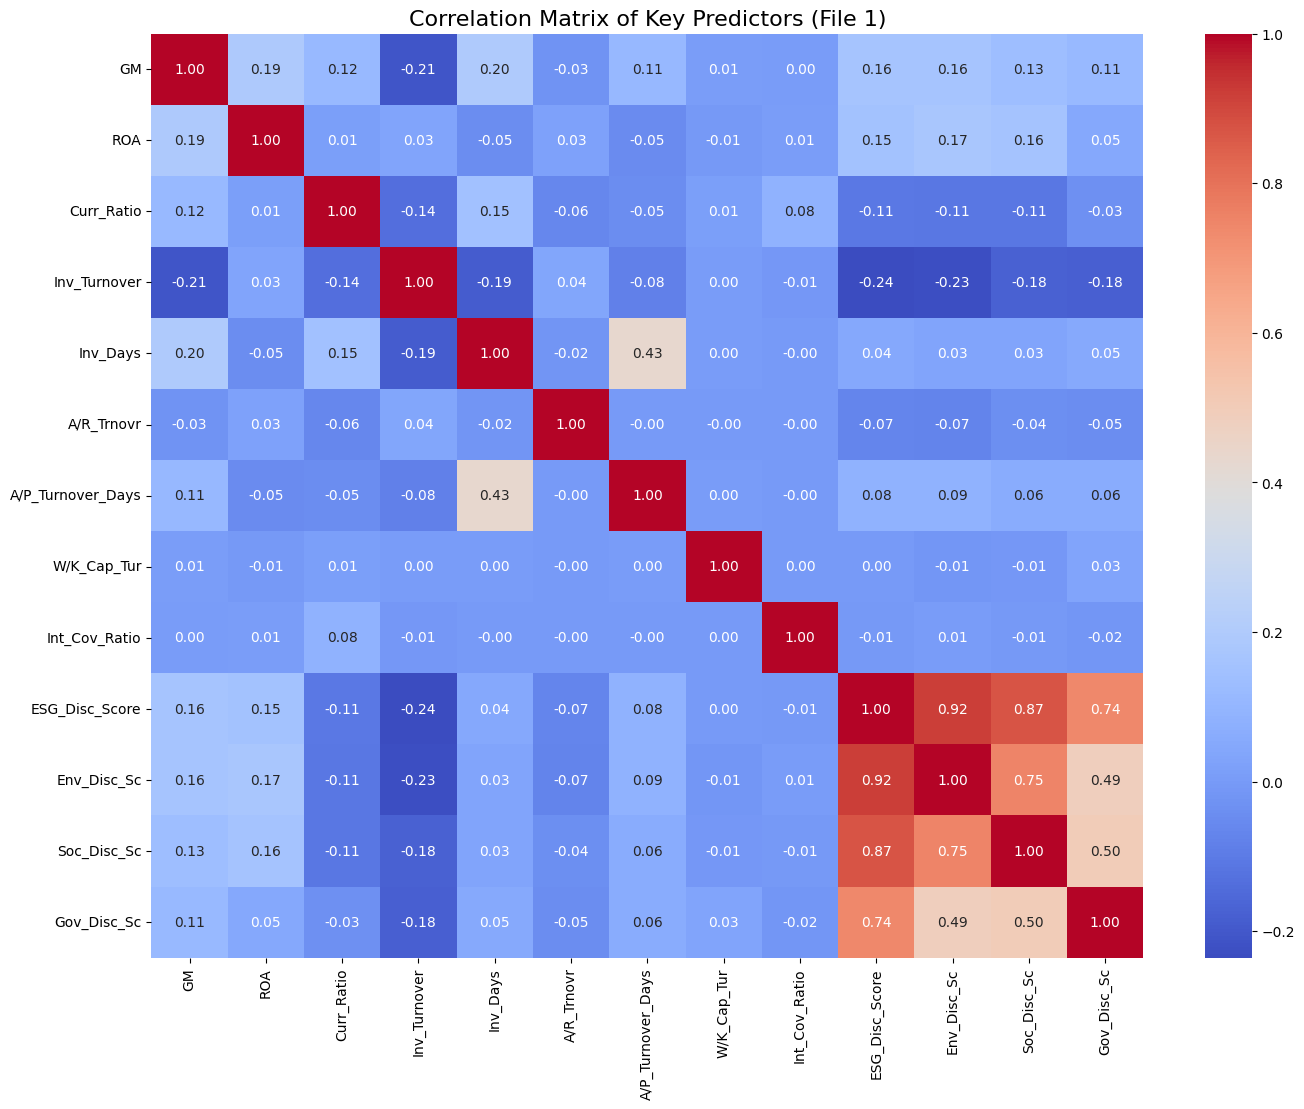


--- Correlation Heatmap for Independent Variables (File 2) ---


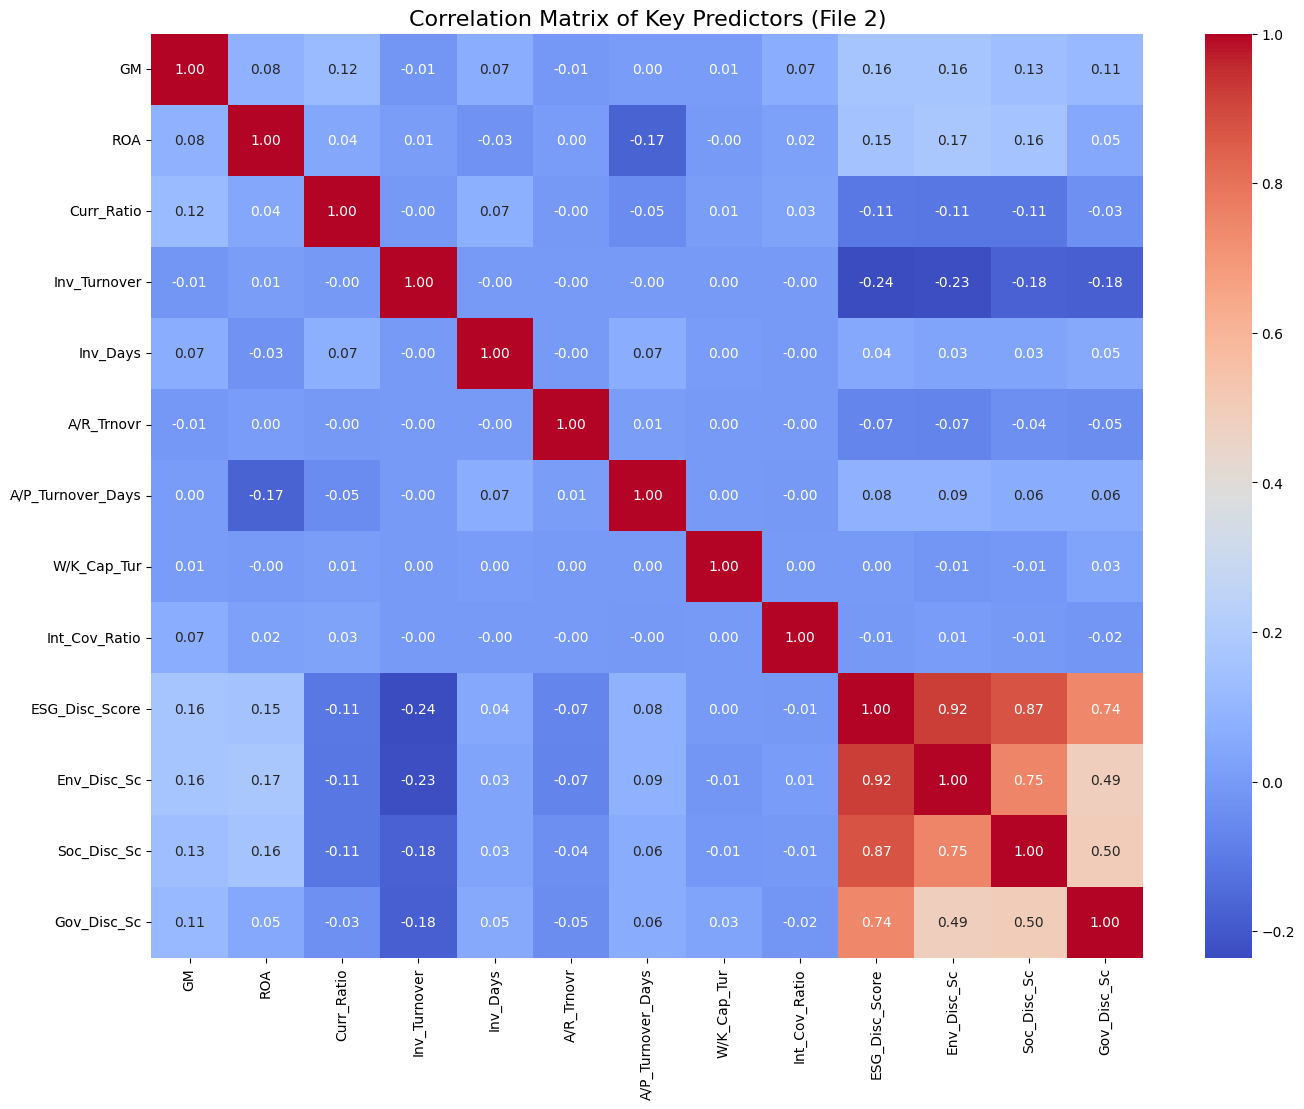

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Assume df1_final and df2_final are your loaded DataFrames ---

# 1. Define the list of columns you want to drop from the analysis
cols_to_drop = [
    'Revenue', 'Curr_Assets', 'Curr_Liab', 'W/K_Cap',
    'Avg_W/K_Cap', 'EBIT', 'Int_Exp', 'CFO', 'Tot_Debt'
]

# --- Heatmap for File 1 ---
print("--- Correlation Heatmap for Independent Variables (File 1) ---")

# 2. Create a new DataFrame for predictors by dropping specified columns
# We also drop identifiers and target variables as before
predictors1 = df1_final.drop(columns=['Company_Ticker', 'Company_Name', 'Year',
                                      'Cash_Flow_to_Debt_Ratio', 'Risk_Category'] + cols_to_drop,
                             errors='ignore') # 'errors=ignore' prevents errors if a column doesn't exist

# 3. Calculate the correlation matrix
corr_matrix1 = predictors1.corr()

# 4. Create the heatmap
plt.figure(figsize=(16, 12)) # Adjusted size for fewer variables
sns.heatmap(corr_matrix1, cmap='coolwarm', annot=True, fmt=".2f") # annot=True is now readable
plt.title('Correlation Matrix of Key Predictors (File 1)', fontsize=16)
plt.show()


# --- Heatmap for File 2 ---
print("\n--- Correlation Heatmap for Independent Variables (File 2) ---")

# Create the predictor DataFrame for File 2
predictors2 = df2_final.drop(columns=['Company_Ticker', 'Company_Name', 'Year',
                                      'Cash_Flow_to_Debt_Ratio', 'Risk_Category',
                                      'ESG_Disc_Score_Flag', 'Env_Disc_Sc_Flag',
                                      'Soc_Disc_Sc_Flag', 'Gov_Disc_Sc_Flag'] + cols_to_drop,
                             errors='ignore')
corr_matrix2 = predictors2.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix2, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Matrix of Key Predictors (File 2)', fontsize=16)
plt.show()

### **3. Visualisations**

--- Visualizations for File 1 (Fully Complete Data) ---


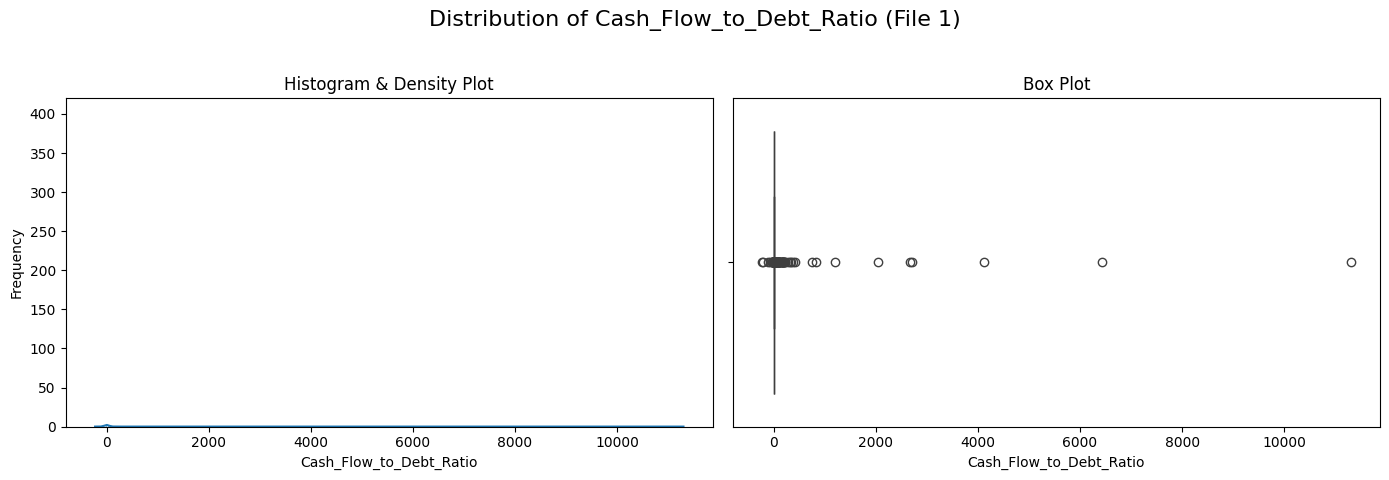

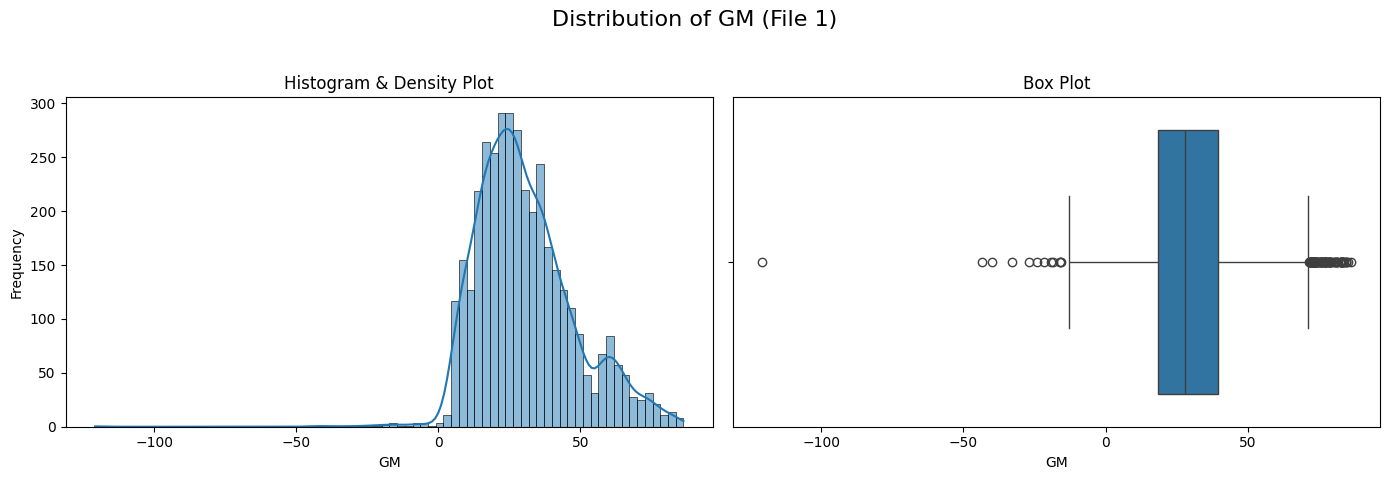

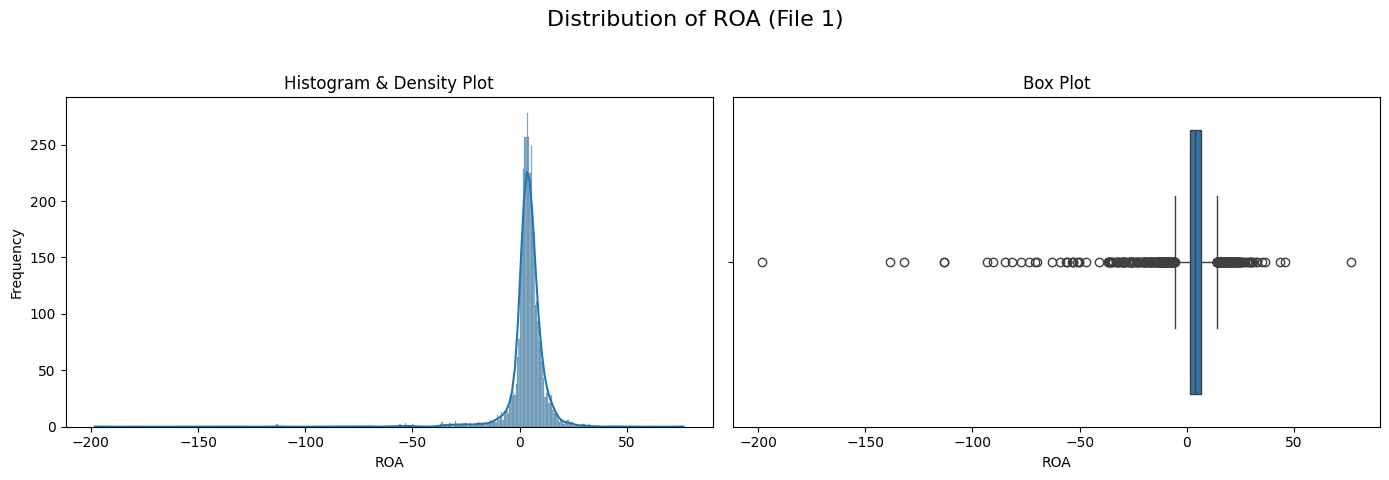

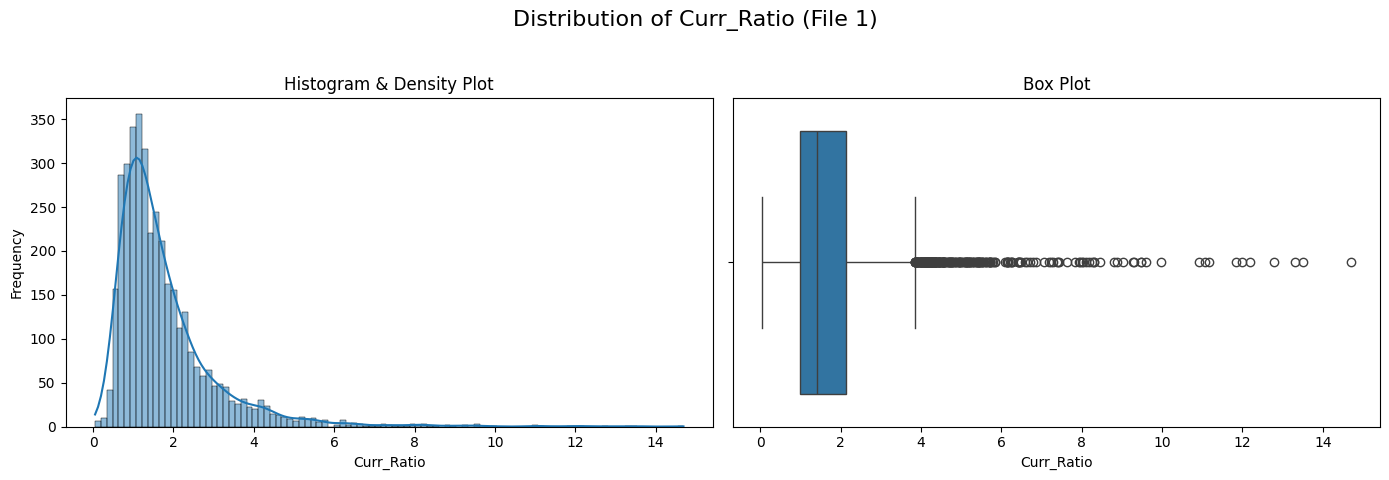

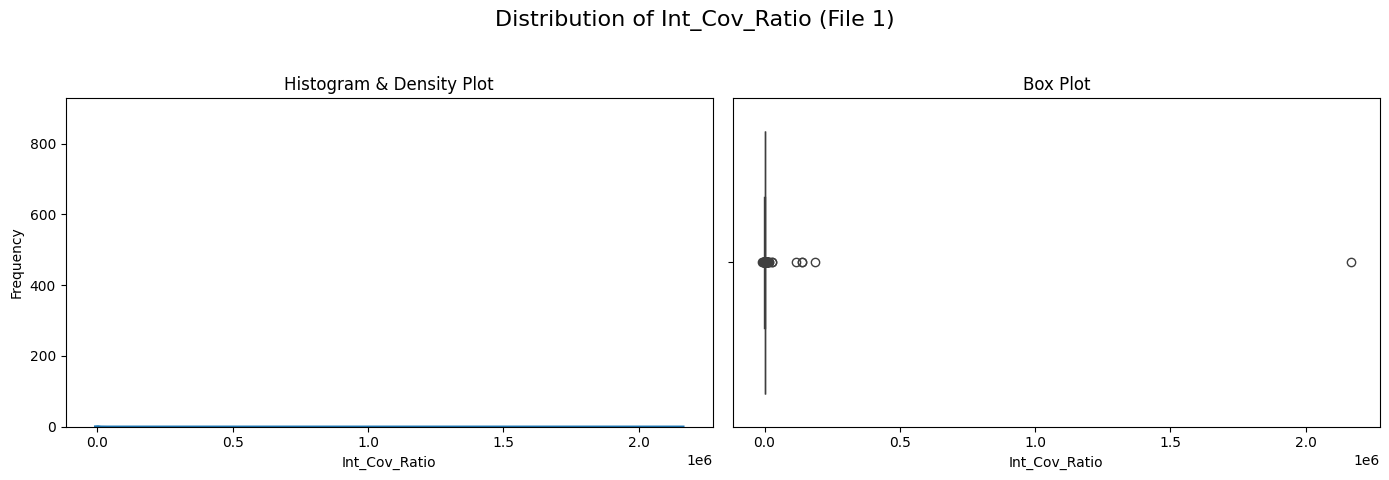

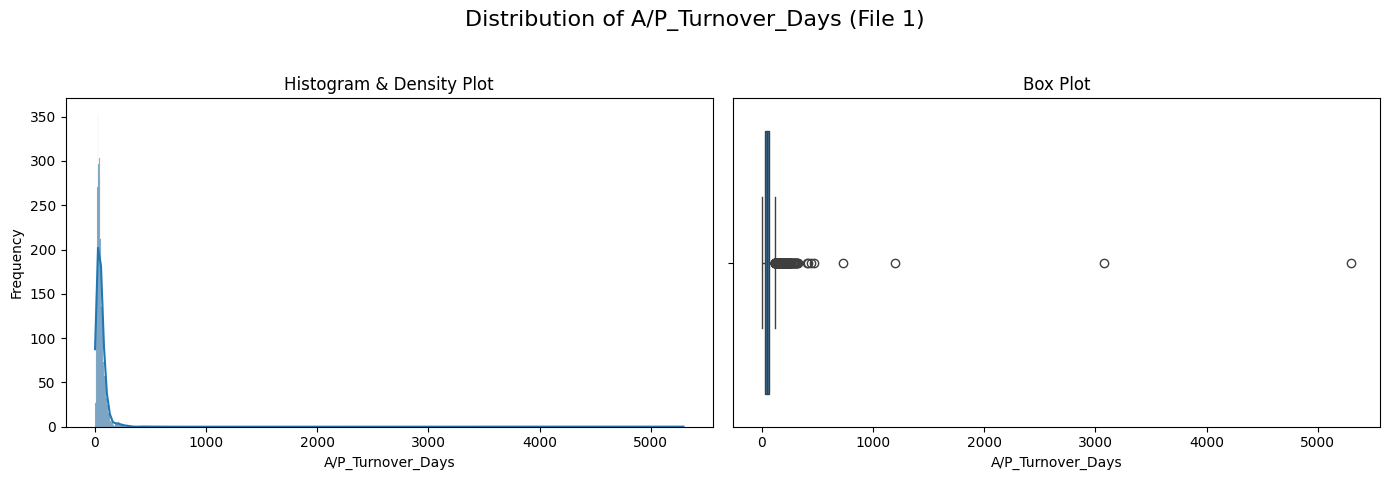

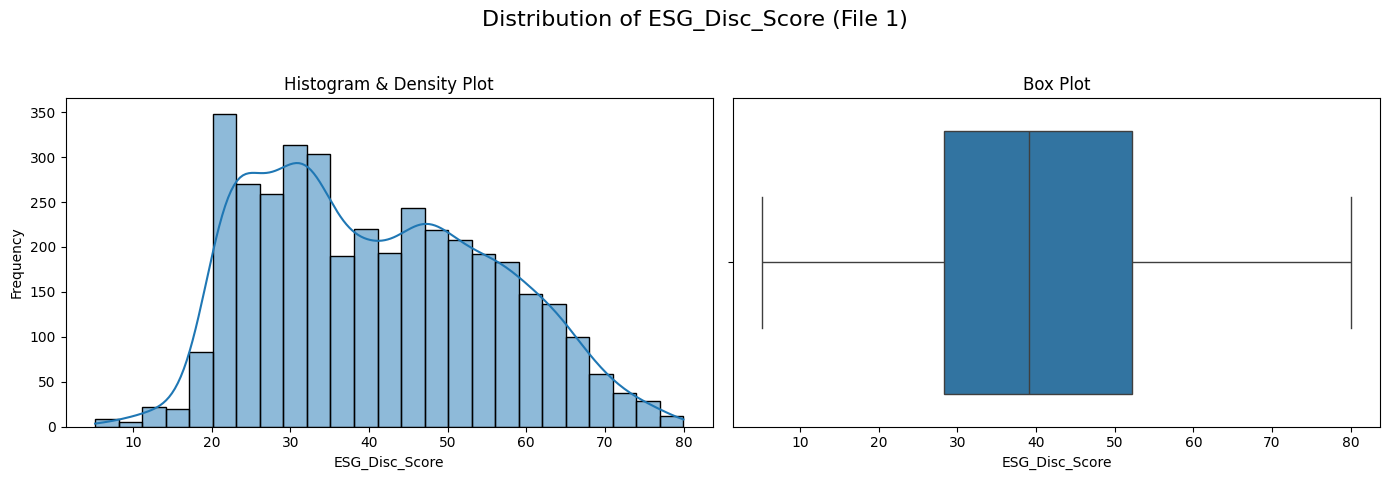


--- Visualizations for File 2 (Financially Complete Data) ---


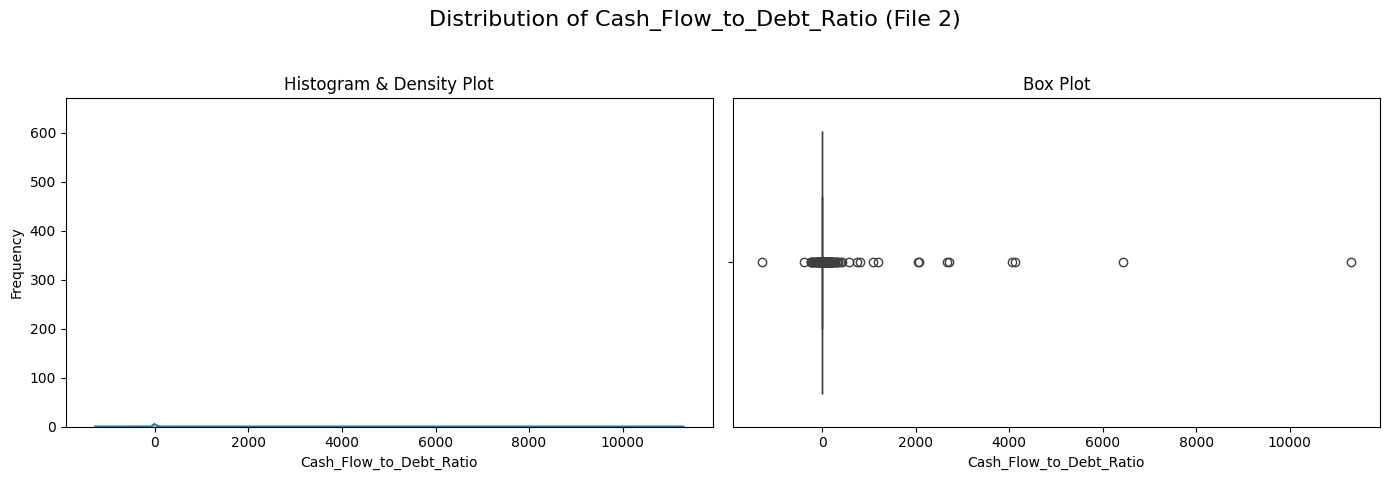

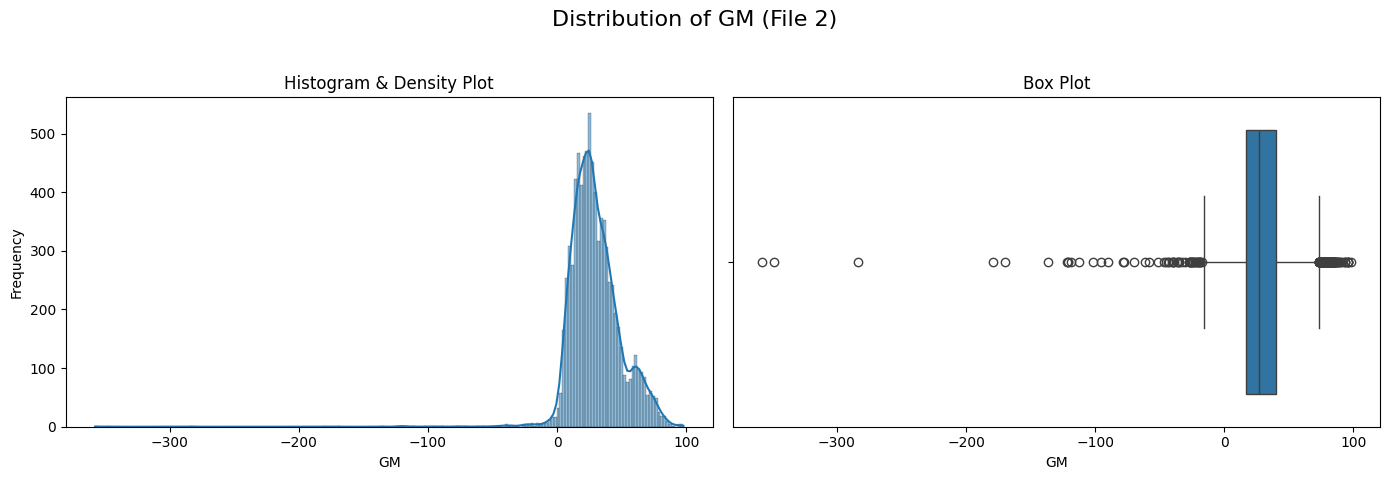

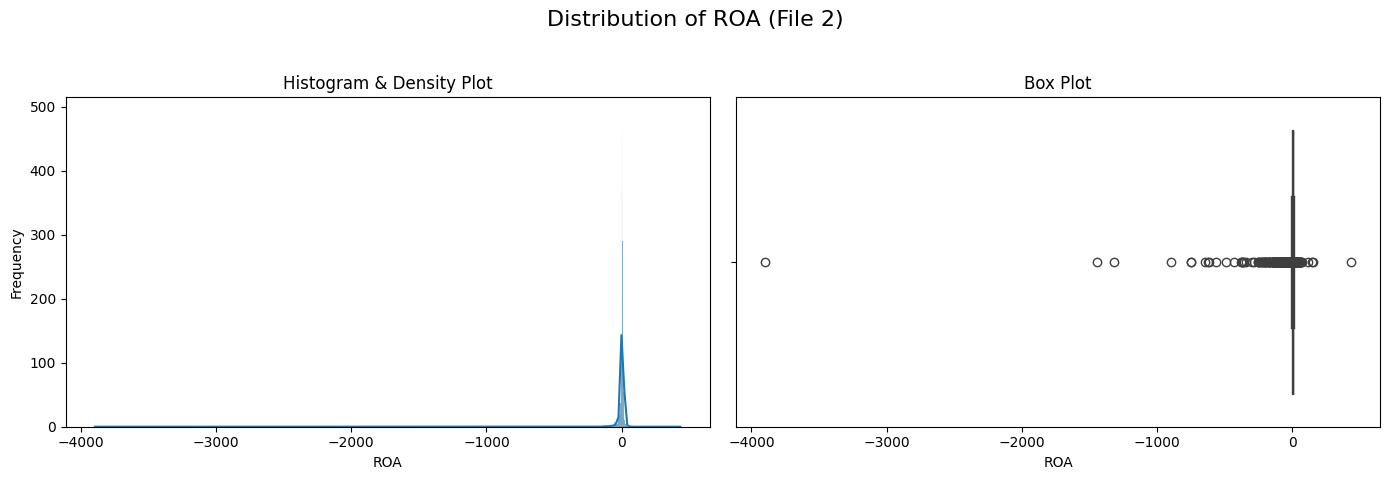

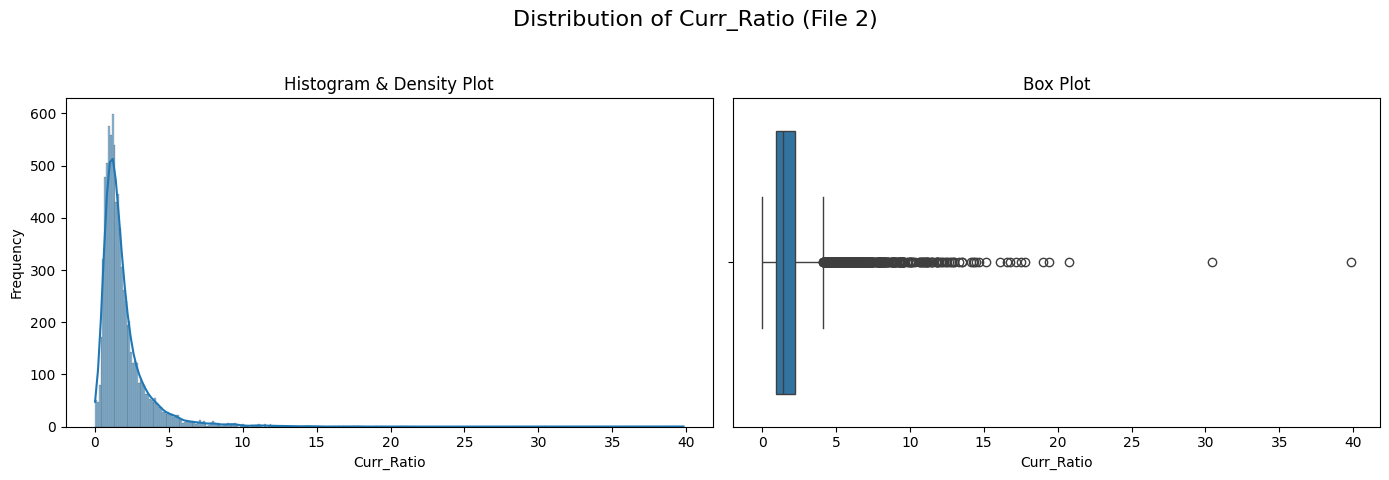

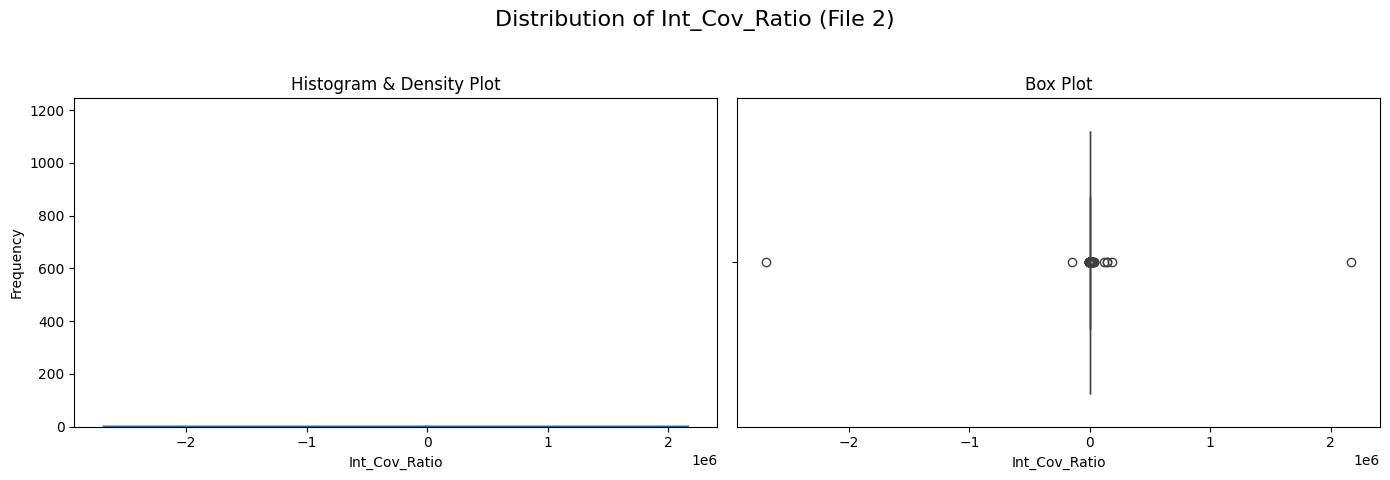

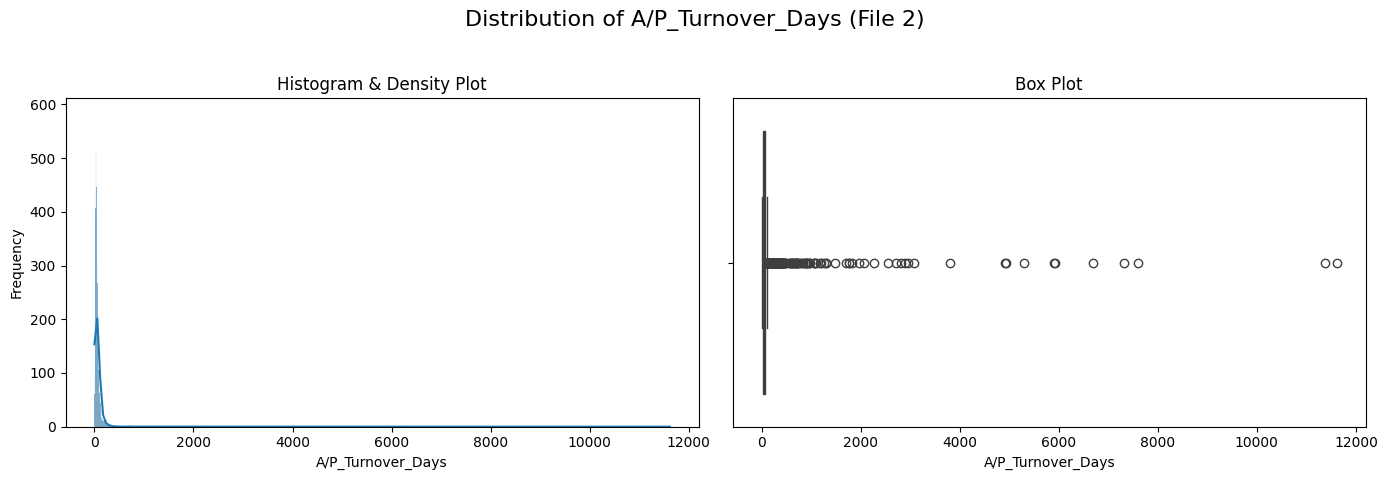

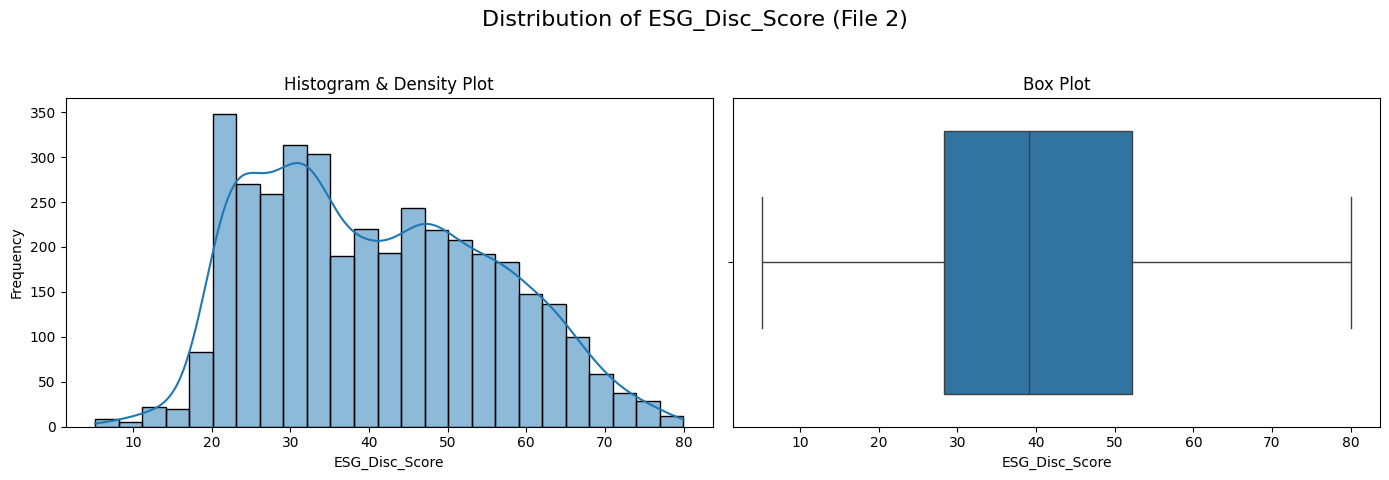

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Assume df1_final and df2_final are your loaded DataFrames ---

# 1. Define the list of key variables you want to visualize
# It's best to focus on your key ratios and target variables
columns_to_visualize = [
    'Cash_Flow_to_Debt_Ratio',
    'GM',
    'ROA',
    'Curr_Ratio',
    'Int_Cov_Ratio',
    'A/P_Turnover_Days',
    'ESG_Disc_Score' # Visualize the main ESG score
]

# --- Function to create plots (to avoid repeating code) ---
def plot_distributions(df, title_suffix):
    """
    This function takes a DataFrame and a title suffix, then generates
    a histogram and box plot for each column in columns_to_visualize.
    """
    for col in columns_to_visualize:
        # Check if the column exists in the DataFrame before plotting
        if col in df.columns:
            # Create a figure with two subplots, side by side
            fig, axes = plt.subplots(1, 2, figsize=(14, 5))
            fig.suptitle(f'Distribution of {col} ({title_suffix})', fontsize=16)

            # --- Subplot 1: Histogram with Density Plot (KDE) ---
            sns.histplot(df[col], kde=True, ax=axes[0])
            axes[0].set_title('Histogram & Density Plot')
            axes[0].set_xlabel(col)
            axes[0].set_ylabel('Frequency')

            # --- Subplot 2: Box Plot ---
            sns.boxplot(x=df[col], ax=axes[1])
            axes[1].set_title('Box Plot')
            axes[1].set_xlabel(col)

            # Display the plots
            plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make room for suptitle
            plt.show()

# --- Generate and display plots for both files ---
print("--- Visualizations for File 1 (Fully Complete Data) ---")
plot_distributions(df1_final, "File 1")

print("\n--- Visualizations for File 2 (Financially Complete Data) ---")
plot_distributions(df2_final, "File 2")

# **Phase 3: Classification Analysis (Predicting the Category of Risk)**

## **Step 3.0: Library Imports and Data Loading**
This title is appropriate because the code is performing two fundamental setup tasks:

1. **Importing Libraries:** It loads all the necessary Python libraries for data manipulation (pandas, numpy), visualization (seaborn, matplotlib), and machine learning (sklearn, xgboost, shap).

2. **Loading Data:** It reads your two primary Excel files into pandas DataFrames, making them available for the analysis that follows.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import shap

# Pre-processing and Modeling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# Evaluation Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load Initial Data
df1_final = pd.read_excel("File1_with_Risk_Category.xlsx")
df2_final = pd.read_excel("File2_with_Risk_Category.xlsx")

## **Step 3.1: Final Data Preparation**
This is the most appropriate name because the code block encapsulates all the essential preprocessing steps required to get your data ready for the machine learning models. As the function's own documentation states, it handles:

*   Defining your predictor and target variables.
*   Splitting the data into training and testing sets.
*   Applying SMOTE to balance the training data.
*   Scaling the features.


In [ ]:
# Not this
print("================== STEP 1: FINAL DATA PREPARATION ==================\n")

def prepare_data(df, file_name):
    """
    This function encapsulates all data preparation steps:
    1. Defines predictors (X) and target (y).
    2. Imputes missing values.
    3. Splits data into training and testing sets (80:20).
    4. Applies SMOTE to the training data only.
    5. Scales the features.
    """
    print(f"--- Preparing data for {file_name} ---")

    # a. Define Predictors (X) and Target (y)
    base_predictor_cols = [
        'GM', 'ROA', 'Curr_Ratio', 'Inv_Turnover', 'Inv_Days', 'A/R_Trnovr',
        'A/P_Turnover_Days', 'W/K_Cap_Tur', 'Int_Cov_Ratio', 'ESG_Disc_Score'
    ]
    predictor_cols = base_predictor_cols + ['ESG_Disc_Score_Flag'] if 'ESG_Disc_Score_Flag' in df.columns else base_predictor_cols
    X = df[predictor_cols].copy()
    y = df['Risk_Category']

    # Impute missing values
    if X.isnull().sum().any():
        median_esg_score = X['ESG_Disc_Score'].median()
        X['ESG_Disc_Score'].fillna(median_esg_score, inplace=True)

    # b. Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # c. Apply SMOTE to Training Data
    smote = SMOTE(random_state=42)
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

    # d. Scale Features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_smote)
    X_test_scaled = scaler.transform(X_test)

    print(f"Data preparation for {file_name} complete.\n")

    return X_train_smote, X_test, y_train_smote, y_test, X_train_scaled, X_test_scaled, scaler

# Prepare data for both files
X1_train_smote, X1_test, y1_train_smote, y1_test, X1_train_scaled, X1_test_scaled, scaler1 = prepare_data(df1_final, "File 1")
X2_train_smote, X2_test, y2_train_smote, y2_test, X2_train_scaled, X2_test_scaled, scaler2 = prepare_data(df2_final, "File 2")

================== STEP 1: FINAL DATA PREPARATION ==================

--- Preparing data for File 1 ---
Data preparation for File 1 complete.

--- Preparing data for File 2 ---
Data preparation for File 2 complete.



/tmp/ipython-input-2-502162444.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['ESG_Disc_Score'].fillna(median_esg_score, inplace=True)


In [ ]:
print("================== STEP 1: FINAL DATA PREPARATION ==================\n")

def prepare_data(df, file_name):
    """
    This function encapsulates all data preparation steps:
    1. Defines predictors (X) and target (y).
    2. Imputes missing values.
    3. Splits data into training and testing sets (80:20).
    4. Applies SMOTE to the training data only.
    5. Scales the features.
    """
    print(f"--- Preparing data for {file_name} ---")

    # a. Define Predictors (X) and Target (y)
    base_predictor_cols = [
        'GM', 'ROA', 'Curr_Ratio', 'Inv_Turnover', 'Inv_Days', 'A/R_Trnovr',
        'A/P_Turnover_Days', 'W/K_Cap_Tur', 'Int_Cov_Ratio', 'ESG_Disc_Score'
    ]
    predictor_cols = base_predictor_cols + ['ESG_Disc_Score_Flag'] if 'ESG_Disc_Score_Flag' in df.columns else base_predictor_cols
    X = df[predictor_cols].copy()
    y = df['Risk_Category']

    # Impute missing values
    if X.isnull().sum().any():
        median_esg_score = X['ESG_Disc_Score'].median()
        X['ESG_Disc_Score'].fillna(median_esg_score, inplace=True)

    # b. Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # c. Apply SMOTE to Training Data
    smote = SMOTE(random_state=42)
    X_train_smote_np, y_train_smote = smote.fit_resample(X_train, y_train)
    # Convert SMOTE output back to DataFrame to preserve column names
    X_train_smote = pd.DataFrame(X_train_smote_np, columns=X_train.columns)


    # d. Scale Features
    scaler = StandardScaler()
    # Convert scaled output back to DataFrames
    X_train_scaled_np = scaler.fit_transform(X_train_smote)
    X_test_scaled_np = scaler.transform(X_test)
    X_train_scaled = pd.DataFrame(X_train_scaled_np, columns=X_train.columns)
    X_test_scaled = pd.DataFrame(X_test_scaled_np, columns=X_test.columns)

    print(f"Data preparation for {file_name} complete.\n")

    return X_train_smote, X_test, y_train_smote, y_test, X_train_scaled, X_test_scaled, scaler

# Prepare data for both files
X1_train_smote, X1_test, y1_train_smote, y1_test, X1_train_scaled, X1_test_scaled, scaler1 = prepare_data(df1_final, "File 1")
X2_train_smote, X2_test, y2_train_smote, y2_test, X2_train_scaled, X2_test_scaled, scaler2 = prepare_data(df2_final, "File 2")


================== STEP 1: FINAL DATA PREPARATION ==================

--- Preparing data for File 1 ---
Data preparation for File 1 complete.

--- Preparing data for File 2 ---
Data preparation for File 2 complete.



/tmp/ipython-input-3-2303307854.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['ESG_Disc_Score'].fillna(median_esg_score, inplace=True)


## **Step 3.2: Model Training and Evaluation**
This is the most accurate name because the code block defines and then executes a comprehensive function (train_and_evaluate) that performs all the core tasks of the modeling phase:

*   Hyperparameter Tuning: It finds the best settings for each model using GridSearchCV.
*   Final Evaluation: It tests the performance of the optimised models.
* Visualisation: It creates confusion matrices and feature importance plots to visualise the results.


============== STEP 2: MODEL TRAINING AND EVALUATION ===============

--- Training and evaluating models for File 1 ---
  Tuning Logistic Regression...
  Best parameters found for Logistic Regression: {'C': 10, 'solver': 'liblinear'}
  Tuning Random Forest...
  Best parameters found for Random Forest: {'max_depth': 20, 'n_estimators': 100}
  Tuning XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:50:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


  Best parameters found for XGBoost: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}

--- Final Evaluation for Logistic Regression (File 1) ---
               precision    recall  f1-score   support

 Low Risk (0)       0.91      0.74      0.81       560
High Risk (1)       0.52      0.80      0.63       200

     accuracy                           0.75       760
    macro avg       0.71      0.77      0.72       760
 weighted avg       0.81      0.75      0.76       760



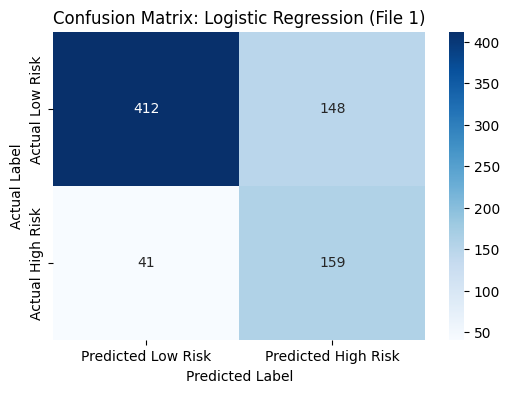


--- Final Evaluation for Random Forest (File 1) ---
               precision    recall  f1-score   support

 Low Risk (0)       0.92      0.85      0.88       560
High Risk (1)       0.65      0.78      0.71       200

     accuracy                           0.83       760
    macro avg       0.78      0.82      0.80       760
 weighted avg       0.85      0.83      0.84       760



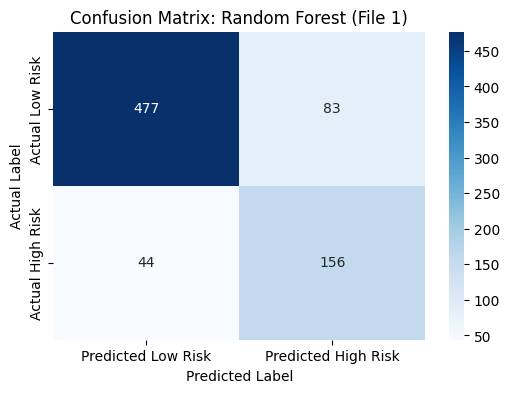

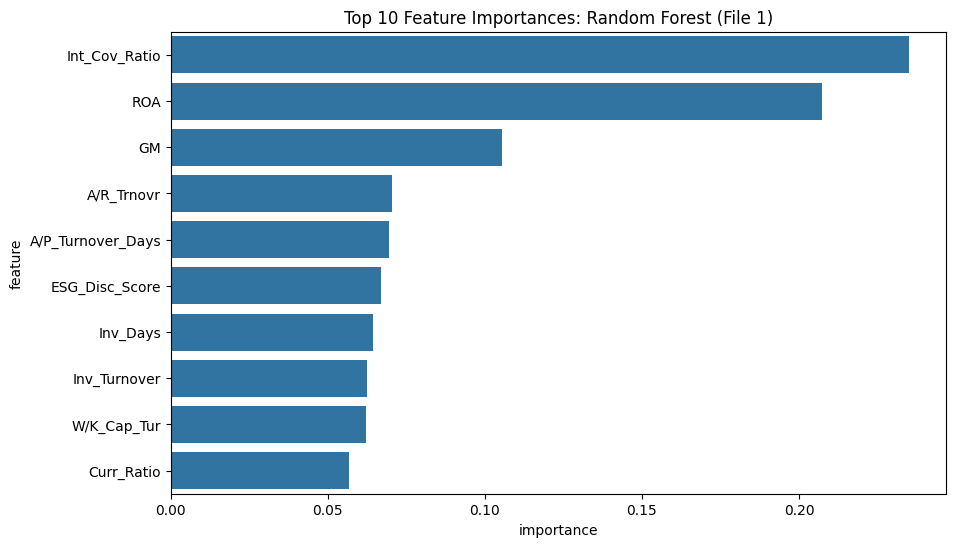


--- Final Evaluation for XGBoost (File 1) ---
               precision    recall  f1-score   support

 Low Risk (0)       0.91      0.85      0.88       560
High Risk (1)       0.65      0.76      0.70       200

     accuracy                           0.83       760
    macro avg       0.78      0.81      0.79       760
 weighted avg       0.84      0.83      0.83       760



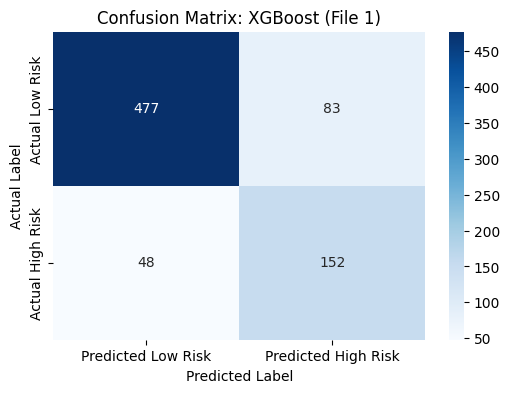

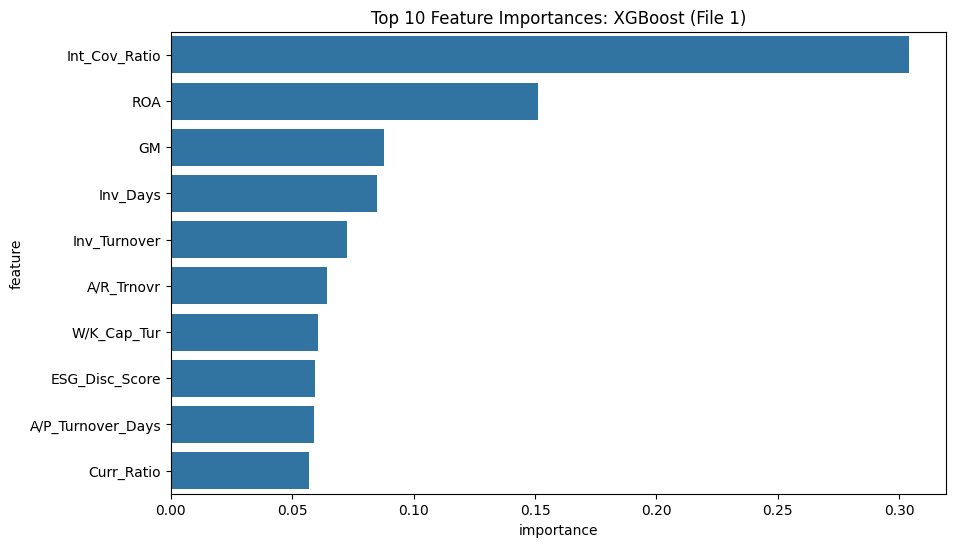

--- Training and evaluating models for File 2 ---
  Tuning Logistic Regression...
  Best parameters found for Logistic Regression: {'C': 10, 'solver': 'liblinear'}
  Tuning Random Forest...
  Best parameters found for Random Forest: {'max_depth': 20, 'n_estimators': 200}
  Tuning XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:50:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


  Best parameters found for XGBoost: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}

--- Final Evaluation for Logistic Regression (File 2) ---
               precision    recall  f1-score   support

 Low Risk (0)       0.82      0.80      0.81      1038
High Risk (1)       0.67      0.69      0.68       603

     accuracy                           0.76      1641
    macro avg       0.74      0.75      0.74      1641
 weighted avg       0.76      0.76      0.76      1641



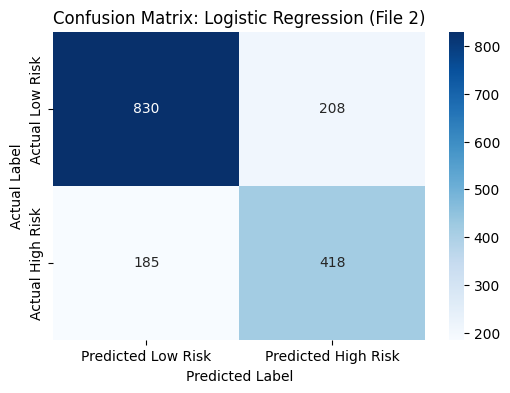


--- Final Evaluation for Random Forest (File 2) ---
               precision    recall  f1-score   support

 Low Risk (0)       0.85      0.84      0.84      1038
High Risk (1)       0.73      0.75      0.74       603

     accuracy                           0.81      1641
    macro avg       0.79      0.79      0.79      1641
 weighted avg       0.81      0.81      0.81      1641



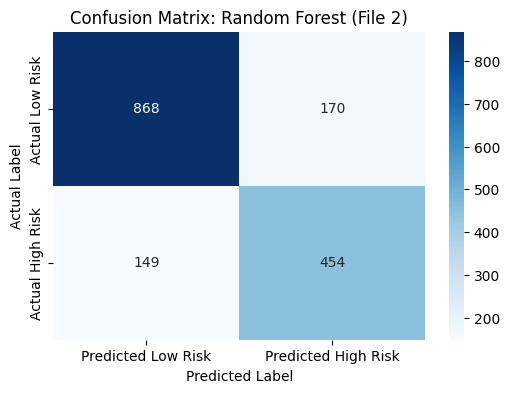

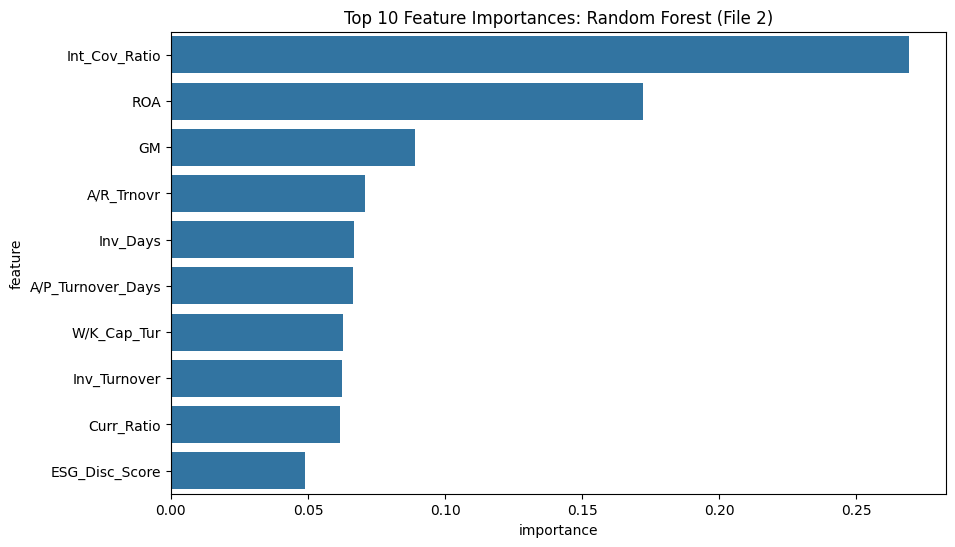


--- Final Evaluation for XGBoost (File 2) ---
               precision    recall  f1-score   support

 Low Risk (0)       0.84      0.83      0.84      1038
High Risk (1)       0.72      0.73      0.73       603

     accuracy                           0.80      1641
    macro avg       0.78      0.78      0.78      1641
 weighted avg       0.80      0.80      0.80      1641



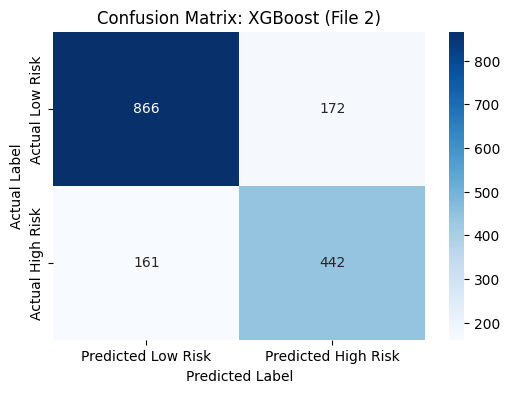

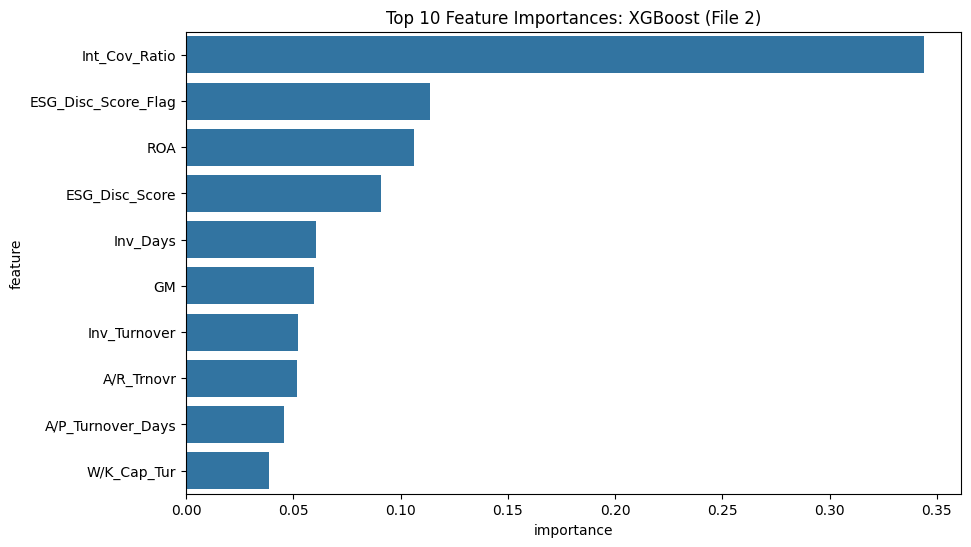

In [ ]:
# Not this
print("\n============== STEP 2: MODEL TRAINING AND EVALUATION ===============\n")

def train_and_evaluate(X_train, y_train, X_test, y_test, X_train_scaled, X_test_scaled, file_name):
    """
    This function encapsulates model training and evaluation:
    1. Defines models and hyperparameter grids.
    2. Performs GridSearchCV to find the best models.
    3. Evaluates the best models on the test set.
    4. Prints classification reports and plots confusion matrices.
    5. Plots standard feature importance.
    """
    print(f"--- Training and evaluating models for {file_name} ---")

    # a. Hyperparameter Tuning
    param_grids = {
        "Logistic Regression": {'C': [0.1, 1, 10], 'solver': ['liblinear']},
        "Random Forest": {'n_estimators': [100, 200], 'max_depth': [10, 20]},
        "XGBoost": {'n_estimators': [100, 200], 'learning_rate': [0.05, 0.1], 'max_depth': [3, 5]}
    }
    models = {
        "Logistic Regression": LogisticRegression(random_state=42),
        "Random Forest": RandomForestClassifier(random_state=42),
        "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
    }

    best_models = {}
    for name, model in models.items():
        print(f"  Tuning {name}...")
        X_train_data = X_train_scaled if name == "Logistic Regression" else X_train
        grid_search = GridSearchCV(model, param_grids[name], cv=3, scoring='f1_weighted', n_jobs=-1, verbose=0)
        grid_search.fit(X_train_data, y_train)
        best_models[name] = grid_search.best_estimator_
        print(f"  Best parameters found for {name}: {grid_search.best_params_}")

    # b. Final Evaluation
    for name, model in best_models.items():
        print(f"\n--- Final Evaluation for {name} ({file_name}) ---")
        X_test_data = X_test_scaled if name == "Logistic Regression" else X_test
        predictions = model.predict(X_test_data)
        print(classification_report(y_test, predictions, target_names=['Low Risk (0)', 'High Risk (1)']))

        # c. Confusion Matrix
        cm = confusion_matrix(y_test, predictions)
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Low Risk', 'Predicted High Risk'], yticklabels=['Actual Low Risk', 'Actual High Risk'])
        plt.title(f'Confusion Matrix: {name} ({file_name})')
        plt.ylabel('Actual Label')
        plt.xlabel('Predicted Label')
        plt.show()

        # d. Feature Importance
        if hasattr(model, 'feature_importances_'):
            importances = model.feature_importances_
            feature_names = X_test.columns
            feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances}).sort_values('importance', ascending=False).head(10)
            plt.figure(figsize=(10, 6))
            sns.barplot(x='importance', y='feature', data=feature_importance_df)
            plt.title(f'Top 10 Feature Importances: {name} ({file_name})')
            plt.show()

    return best_models

# Run training and evaluation for both files
best_models1 = train_and_evaluate(X1_train_smote, y1_train_smote, X1_test, y1_test, X1_train_scaled, X1_test_scaled, "File 1")
best_models2 = train_and_evaluate(X2_train_smote, y2_train_smote, X2_test, y2_test, X2_train_scaled, X2_test_scaled, "File 2")



============== STEP 2: MODEL TRAINING AND EVALUATION ===============

--- Training and evaluating models for File 1 ---
  Tuning Logistic Regression...
  Best parameters found for Logistic Regression: {'C': 10, 'solver': 'liblinear'}
  Tuning Random Forest...
  Best parameters found for Random Forest: {'max_depth': 20, 'n_estimators': 100}
  Tuning XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:05:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


  Best parameters found for XGBoost: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}

--- Final Evaluation for Logistic Regression (File 1) ---
               precision    recall  f1-score   support

 Low Risk (0)       0.91      0.74      0.81       560
High Risk (1)       0.52      0.80      0.63       200

     accuracy                           0.75       760
    macro avg       0.71      0.77      0.72       760
 weighted avg       0.81      0.75      0.76       760



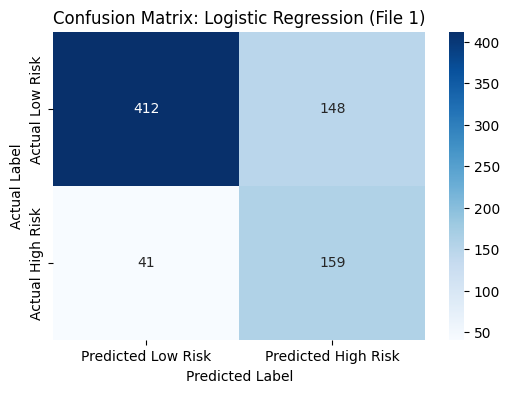

/tmp/ipython-input-13-4251227835.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='coefficient', y='feature', data=coeff_df, palette=coeff_df['color'].tolist())


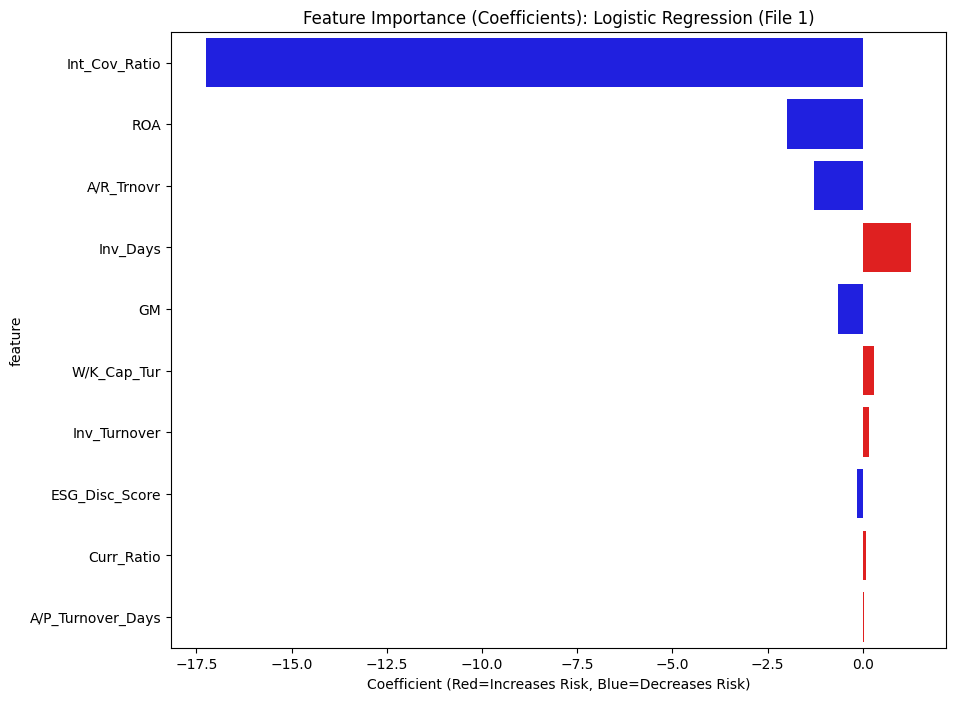


--- Final Evaluation for Random Forest (File 1) ---
               precision    recall  f1-score   support

 Low Risk (0)       0.92      0.85      0.88       560
High Risk (1)       0.65      0.78      0.71       200

     accuracy                           0.83       760
    macro avg       0.78      0.82      0.80       760
 weighted avg       0.85      0.83      0.84       760



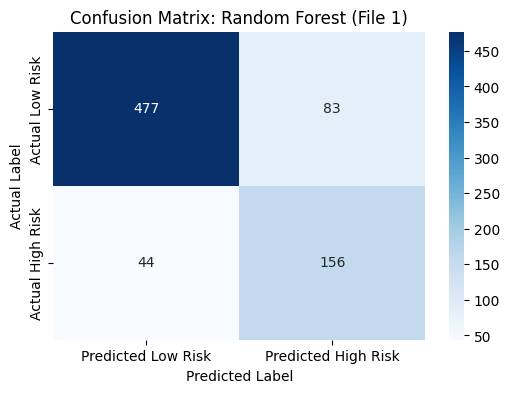

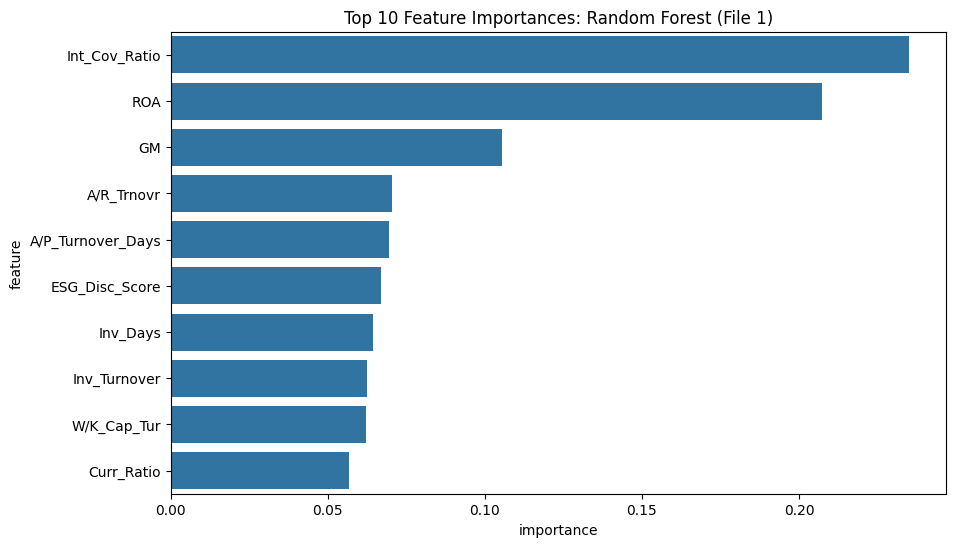


--- Final Evaluation for XGBoost (File 1) ---
               precision    recall  f1-score   support

 Low Risk (0)       0.91      0.85      0.88       560
High Risk (1)       0.65      0.76      0.70       200

     accuracy                           0.83       760
    macro avg       0.78      0.81      0.79       760
 weighted avg       0.84      0.83      0.83       760



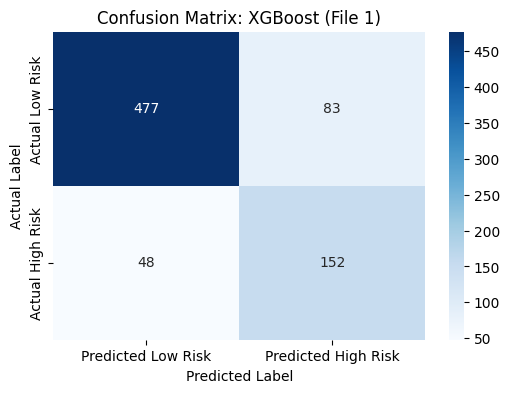

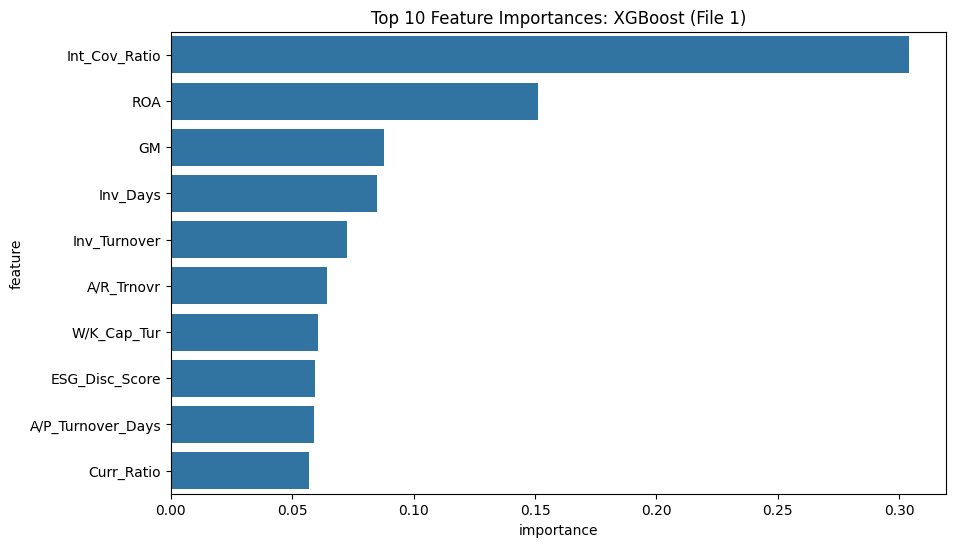

--- Training and evaluating models for File 2 ---
  Tuning Logistic Regression...
  Best parameters found for Logistic Regression: {'C': 10, 'solver': 'liblinear'}
  Tuning Random Forest...
  Best parameters found for Random Forest: {'max_depth': 20, 'n_estimators': 200}
  Tuning XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:05:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


  Best parameters found for XGBoost: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}

--- Final Evaluation for Logistic Regression (File 2) ---
               precision    recall  f1-score   support

 Low Risk (0)       0.82      0.80      0.81      1038
High Risk (1)       0.67      0.69      0.68       603

     accuracy                           0.76      1641
    macro avg       0.74      0.75      0.74      1641
 weighted avg       0.76      0.76      0.76      1641



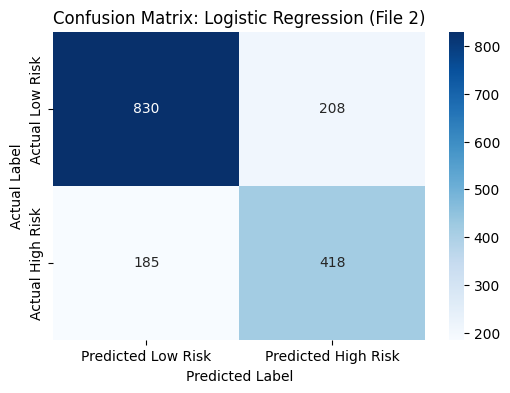

/tmp/ipython-input-13-4251227835.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='coefficient', y='feature', data=coeff_df, palette=coeff_df['color'].tolist())


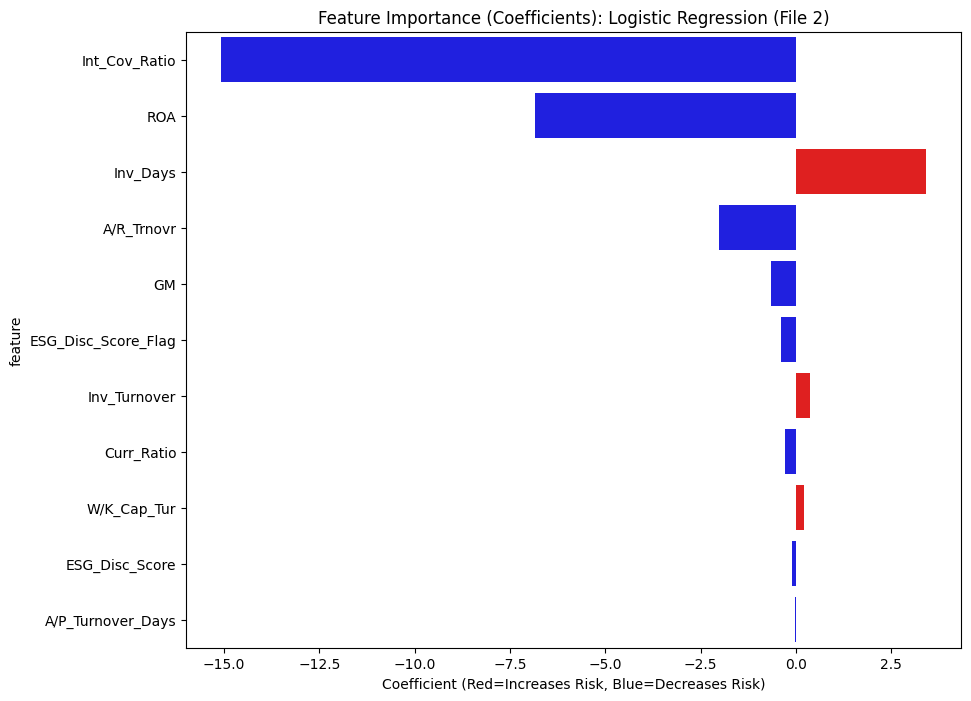


--- Final Evaluation for Random Forest (File 2) ---
               precision    recall  f1-score   support

 Low Risk (0)       0.85      0.84      0.84      1038
High Risk (1)       0.73      0.75      0.74       603

     accuracy                           0.81      1641
    macro avg       0.79      0.79      0.79      1641
 weighted avg       0.81      0.81      0.81      1641



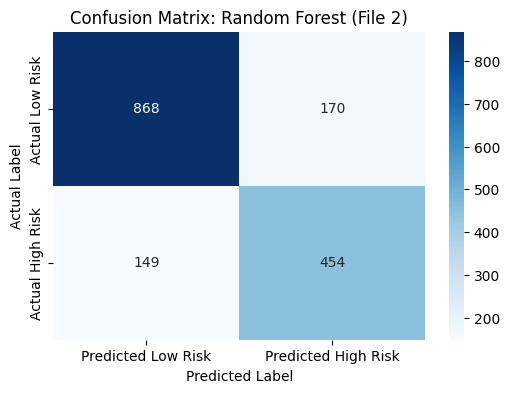

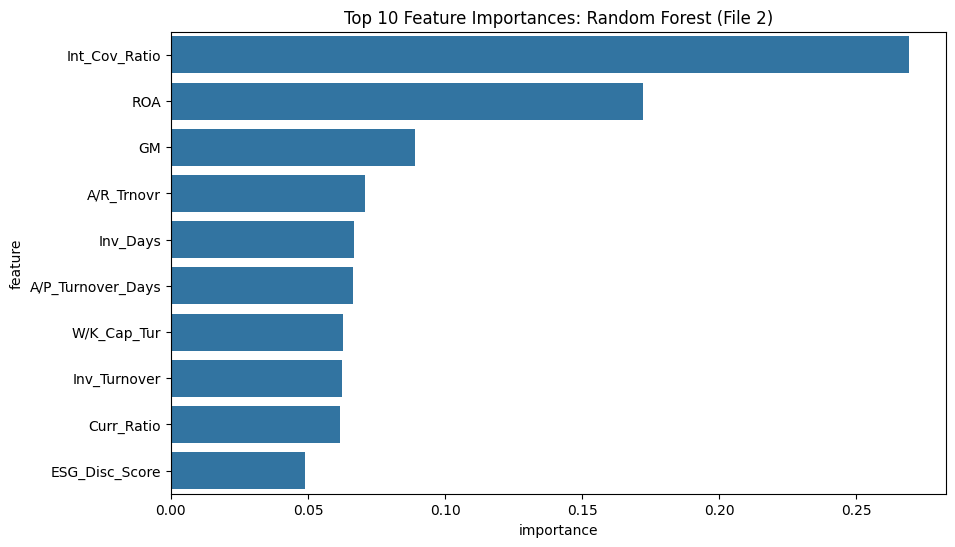


--- Final Evaluation for XGBoost (File 2) ---
               precision    recall  f1-score   support

 Low Risk (0)       0.84      0.83      0.84      1038
High Risk (1)       0.72      0.73      0.73       603

     accuracy                           0.80      1641
    macro avg       0.78      0.78      0.78      1641
 weighted avg       0.80      0.80      0.80      1641



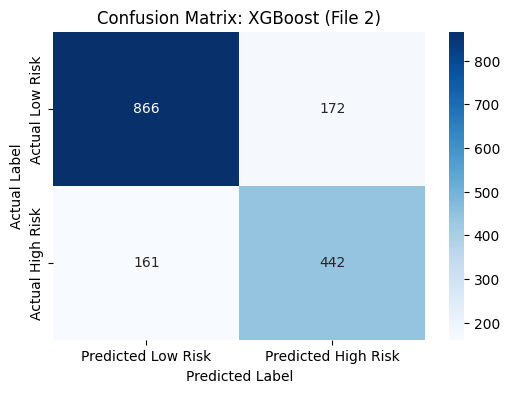

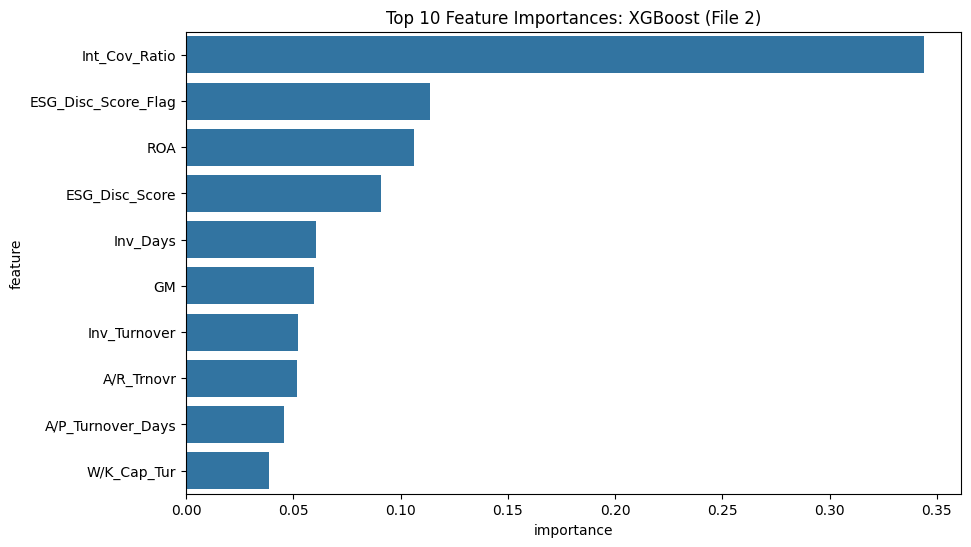

In [ ]:
print("\n============== STEP 2: MODEL TRAINING AND EVALUATION ===============\n")

def train_and_evaluate(X_train, y_train, X_test, y_test, X_train_scaled, X_test_scaled, file_name):
    """
    This function encapsulates model training and evaluation:
    1. Defines models and hyperparameter grids.
    2. Performs GridSearchCV to find the best models.
    3. Evaluates the best models on the test set.
    4. Prints classification reports and plots confusion matrices.
    5. Plots standard feature importance for all models.
    """
    print(f"--- Training and evaluating models for {file_name} ---")

    # a. Hyperparameter Tuning
    param_grids = {
        "Logistic Regression": {'C': [0.1, 1, 10], 'solver': ['liblinear']},
        "Random Forest": {'n_estimators': [100, 200], 'max_depth': [10, 20]},
        "XGBoost": {'n_estimators': [100, 200], 'learning_rate': [0.05, 0.1], 'max_depth': [3, 5]}
    }
    models = {
        "Logistic Regression": LogisticRegression(random_state=42),
        "Random Forest": RandomForestClassifier(random_state=42),
        "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
    }

    best_models = {}
    for name, model in models.items():
        print(f"  Tuning {name}...")
        X_train_data = X_train_scaled if name == "Logistic Regression" else X_train
        grid_search = GridSearchCV(model, param_grids[name], cv=3, scoring='f1_weighted', n_jobs=-1, verbose=0)
        grid_search.fit(X_train_data, y_train)
        best_models[name] = grid_search.best_estimator_
        print(f"  Best parameters found for {name}: {grid_search.best_params_}")

    # b. Final Evaluation
    for name, model in best_models.items():
        print(f"\n--- Final Evaluation for {name} ({file_name}) ---")
        X_test_data = X_test_scaled if name == "Logistic Regression" else X_test
        predictions = model.predict(X_test_data)
        print(classification_report(y_test, predictions, target_names=['Low Risk (0)', 'High Risk (1)']))

        # c. Confusion Matrix
        cm = confusion_matrix(y_test, predictions)
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Low Risk', 'Predicted High Risk'], yticklabels=['Actual Low Risk', 'Actual High Risk'])
        plt.title(f'Confusion Matrix: {name} ({file_name})')
        plt.ylabel('Actual Label')
        plt.xlabel('Predicted Label')
        plt.show()

        # d. Feature Importance
        if hasattr(model, 'feature_importances_'):
            importances = model.feature_importances_
            feature_names = X_test.columns
            feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances}).sort_values('importance', ascending=False).head(10)
            plt.figure(figsize=(10, 6))
            sns.barplot(x='importance', y='feature', data=feature_importance_df)
            plt.title(f'Top 10 Feature Importances: {name} ({file_name})')
            plt.show()

        elif name == "Logistic Regression":
            coeffs = model.coef_[0]
            feature_names = X_test.columns
            coeff_df = pd.DataFrame({'feature': feature_names, 'coefficient': coeffs})
            coeff_df['abs_coefficient'] = np.abs(coeff_df['coefficient'])
            coeff_df = coeff_df.sort_values('abs_coefficient', ascending=False)
            coeff_df['color'] = ['red' if c > 0 else 'blue' for c in coeff_df['coefficient']]

            plt.figure(figsize=(10, 8))
            # --- FIX: Convert the color Series to a list to resolve the ambiguity ---
            sns.barplot(x='coefficient', y='feature', data=coeff_df, palette=coeff_df['color'].tolist())
            plt.title(f'Feature Importance (Coefficients): {name} ({file_name})')
            plt.xlabel('Coefficient (Red=Increases Risk, Blue=Decreases Risk)')
            plt.show()

    return best_models

# Run training and evaluation for both files
best_models1 = train_and_evaluate(X1_train_smote, y1_train_smote, X1_test, y1_test, X1_train_scaled, X1_test_scaled, "File 1")
best_models2 = train_and_evaluate(X2_train_smote, y2_train_smote, X2_test, y2_test, X2_train_scaled, X2_test_scaled, "File 2")




============== STEP 2: MODEL TRAINING AND EVALUATION ===============

--- Training and evaluating models for File 1 ---
  Tuning Logistic Regression...
  Best parameters found for Logistic Regression: {'C': 10, 'solver': 'liblinear'}
  Tuning Random Forest...
  Best parameters found for Random Forest: {'max_depth': 20, 'n_estimators': 100}
  Tuning XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:38:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


  Best parameters found for XGBoost: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}

--- Final Evaluation for Logistic Regression (File 1) ---
               precision    recall  f1-score   support

 Low Risk (0)       0.91      0.74      0.81       560
High Risk (1)       0.52      0.80      0.63       200

     accuracy                           0.75       760
    macro avg       0.71      0.77      0.72       760
 weighted avg       0.81      0.75      0.76       760



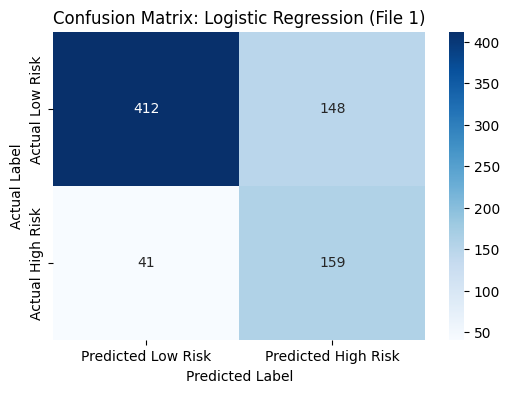

/tmp/ipython-input-4-465829670.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='coefficient', y='feature', data=coeff_df, palette=coeff_df['color'].tolist())


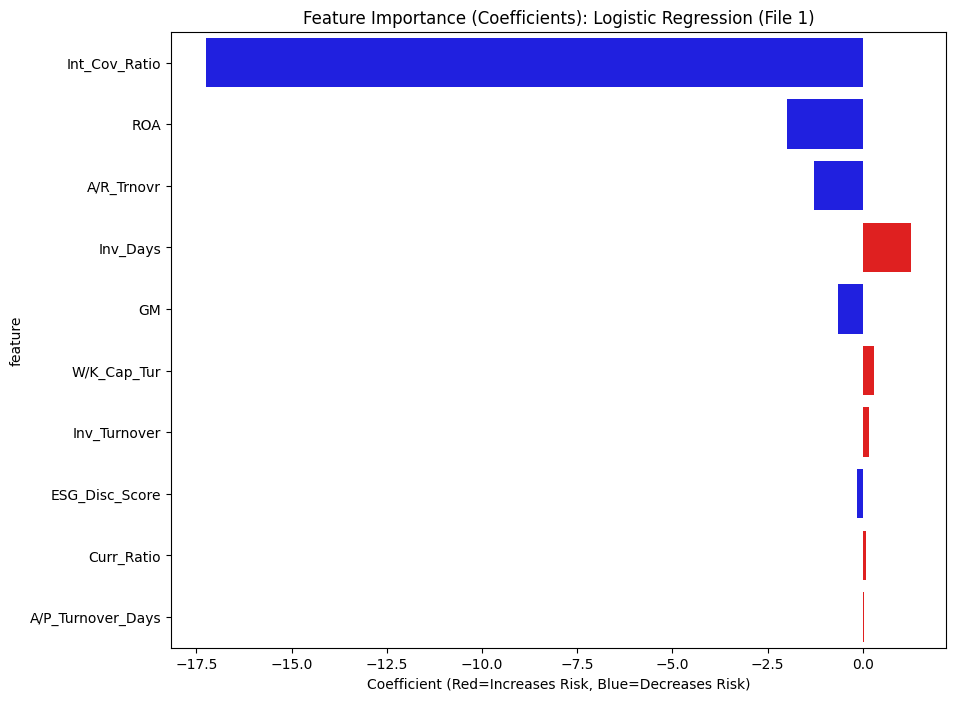


--- Final Evaluation for Random Forest (File 1) ---
               precision    recall  f1-score   support

 Low Risk (0)       0.92      0.85      0.88       560
High Risk (1)       0.65      0.78      0.71       200

     accuracy                           0.83       760
    macro avg       0.78      0.82      0.80       760
 weighted avg       0.85      0.83      0.84       760



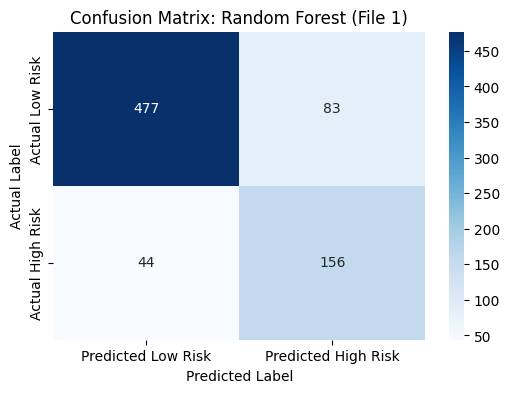

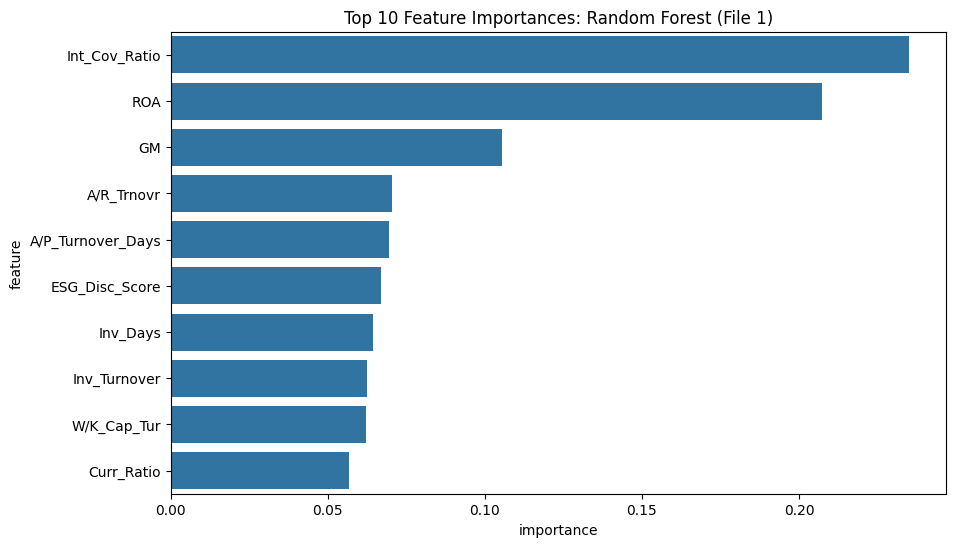


--- Final Evaluation for XGBoost (File 1) ---
               precision    recall  f1-score   support

 Low Risk (0)       0.91      0.85      0.88       560
High Risk (1)       0.65      0.76      0.70       200

     accuracy                           0.83       760
    macro avg       0.78      0.81      0.79       760
 weighted avg       0.84      0.83      0.83       760



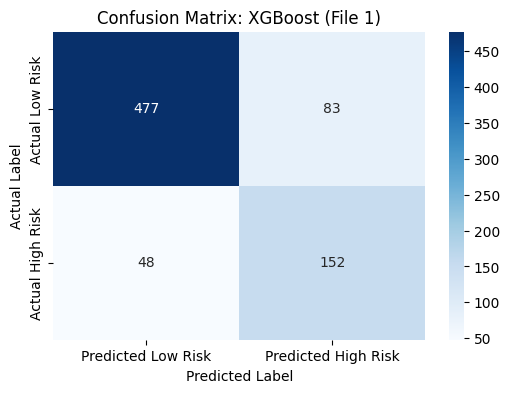

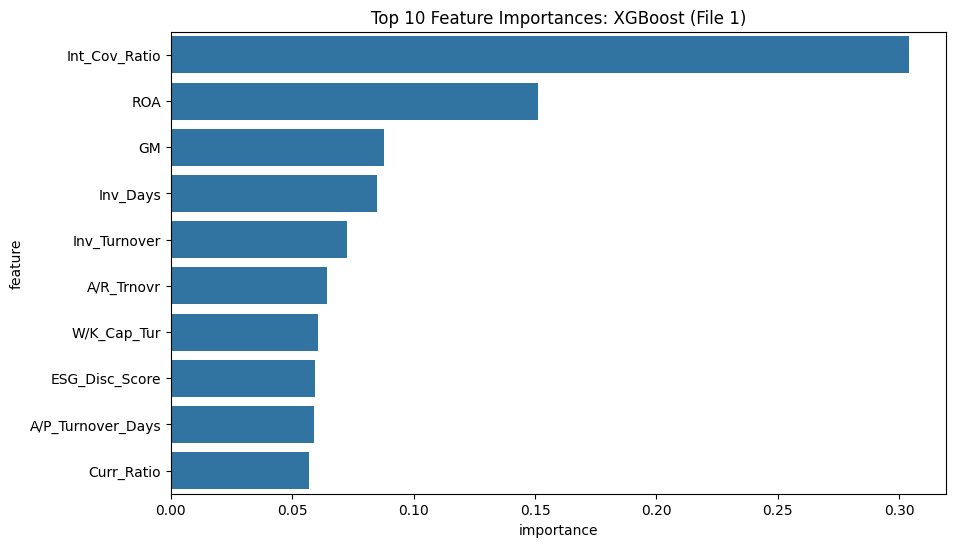

--- Training and evaluating models for File 2 ---
  Tuning Logistic Regression...
  Best parameters found for Logistic Regression: {'C': 10, 'solver': 'liblinear'}
  Tuning Random Forest...
  Best parameters found for Random Forest: {'max_depth': 20, 'n_estimators': 200}
  Tuning XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:39:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


  Best parameters found for XGBoost: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}

--- Final Evaluation for Logistic Regression (File 2) ---
               precision    recall  f1-score   support

 Low Risk (0)       0.82      0.80      0.81      1038
High Risk (1)       0.67      0.69      0.68       603

     accuracy                           0.76      1641
    macro avg       0.74      0.75      0.74      1641
 weighted avg       0.76      0.76      0.76      1641



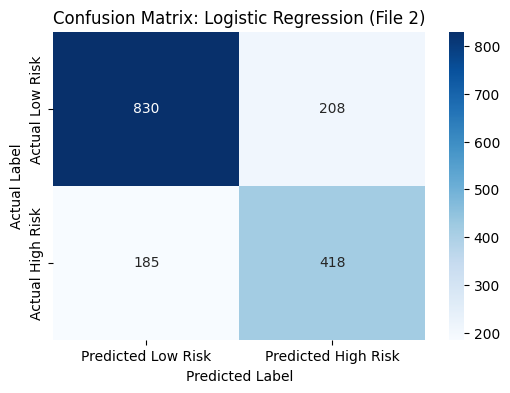

/tmp/ipython-input-4-465829670.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='coefficient', y='feature', data=coeff_df, palette=coeff_df['color'].tolist())


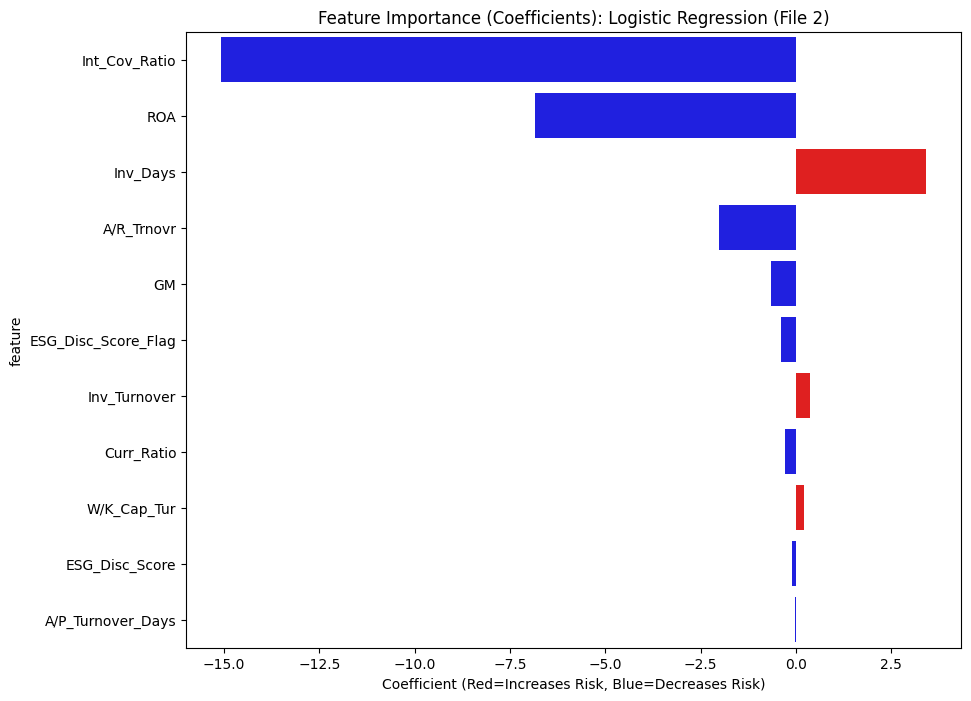


--- Final Evaluation for Random Forest (File 2) ---
               precision    recall  f1-score   support

 Low Risk (0)       0.85      0.84      0.84      1038
High Risk (1)       0.73      0.75      0.74       603

     accuracy                           0.81      1641
    macro avg       0.79      0.79      0.79      1641
 weighted avg       0.81      0.81      0.81      1641



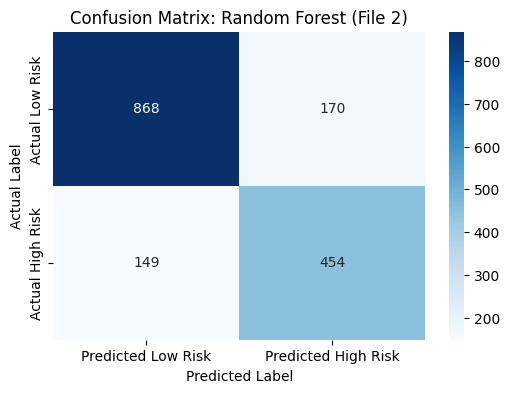

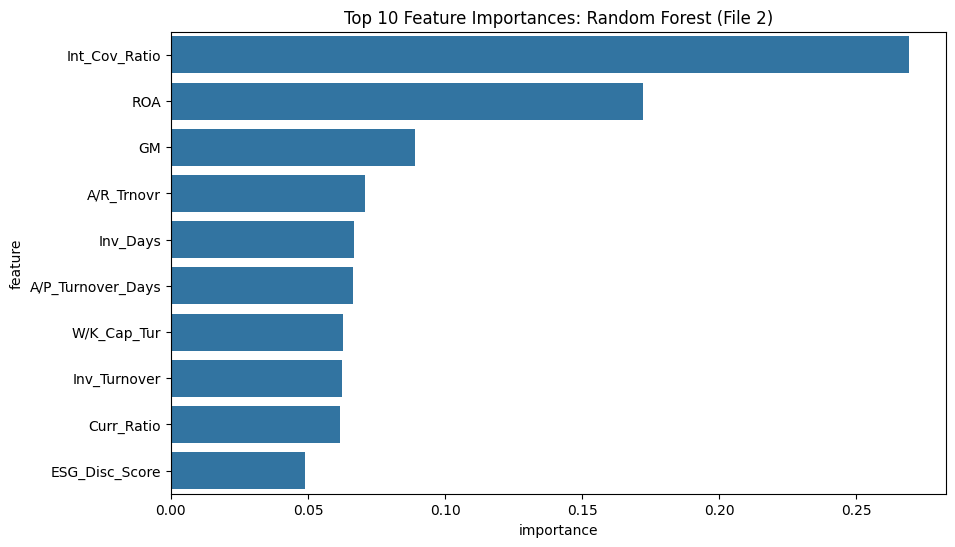


--- Final Evaluation for XGBoost (File 2) ---
               precision    recall  f1-score   support

 Low Risk (0)       0.84      0.83      0.84      1038
High Risk (1)       0.72      0.73      0.73       603

     accuracy                           0.80      1641
    macro avg       0.78      0.78      0.78      1641
 weighted avg       0.80      0.80      0.80      1641



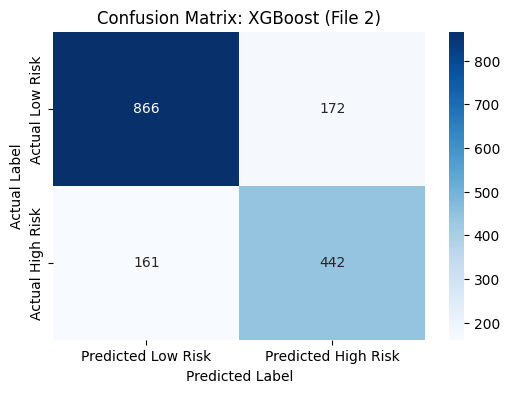

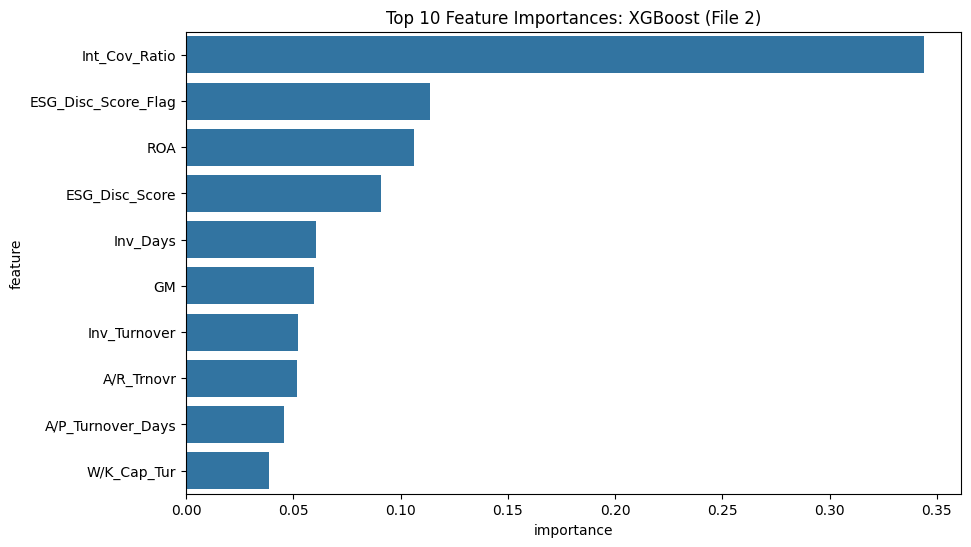


--- Overall Model Performance Summary for File 1 ---


,Model,Precision,Recall,F1-Score,Support
0,Logistic Regression,0.8064,0.7513,0.7644,760.000000
1,Random Forest,0.8464,0.8329,0.8373,760.000000
2,XGBoost,0.8397,0.8276,0.8318,760.000000



--- Overall Model Performance Summary for File 2 ---


,Model,Precision,Recall,F1-Score,Support
0,Logistic Regression,0.7626,0.7605,0.7614,1641.000000
1,Random Forest,0.8072,0.8056,0.8063,1641.000000
2,XGBoost,0.7979,0.7971,0.7975,1641.000000


In [ ]:
print("\n============== STEP 2: MODEL TRAINING AND EVALUATION ===============\n")

def train_and_evaluate(X_train, y_train, X_test, y_test, X_train_scaled, X_test_scaled, file_name):
    """
    This function encapsulates model training and evaluation:
    1. Defines models and hyperparameter grids.
    2. Performs GridSearchCV to find the best models.
    3. Evaluates the best models on the test set.
    4. Prints classification reports and plots confusion matrices.
    5. Plots standard feature importance for all models.
    6. Returns the best models and a list of performance results.
    """
    print(f"--- Training and evaluating models for {file_name} ---")

    # a. Hyperparameter Tuning
    param_grids = {
        "Logistic Regression": {'C': [0.1, 1, 10], 'solver': ['liblinear']},
        "Random Forest": {'n_estimators': [100, 200], 'max_depth': [10, 20]},
        "XGBoost": {'n_estimators': [100, 200], 'learning_rate': [0.05, 0.1], 'max_depth': [3, 5]}
    }
    models = {
        "Logistic Regression": LogisticRegression(random_state=42),
        "Random Forest": RandomForestClassifier(random_state=42),
        "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
    }

    best_models = {}
    evaluation_results = []
    for name, model in models.items():
        print(f"  Tuning {name}...")
        X_train_data = X_train_scaled if name == "Logistic Regression" else X_train
        grid_search = GridSearchCV(model, param_grids[name], cv=3, scoring='f1_weighted', n_jobs=-1, verbose=0)
        grid_search.fit(X_train_data, y_train)
        best_models[name] = grid_search.best_estimator_
        print(f"  Best parameters found for {name}: {grid_search.best_params_}")

    # b. Final Evaluation
    for name, model in best_models.items():
        print(f"\n--- Final Evaluation for {name} ({file_name}) ---")
        X_test_data = X_test_scaled if name == "Logistic Regression" else X_test
        predictions = model.predict(X_test_data)

        # Print and store classification report
        report_str = classification_report(y_test, predictions, target_names=['Low Risk (0)', 'High Risk (1)'])
        print(report_str)
        report_dict = classification_report(y_test, predictions, output_dict=True)

        # Store detailed results
        res = {'Model': name}
        res.update(report_dict['weighted avg'])
        evaluation_results.append(res)

        # c. Confusion Matrix
        cm = confusion_matrix(y_test, predictions)
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Low Risk', 'Predicted High Risk'], yticklabels=['Actual Low Risk', 'Actual High Risk'])
        plt.title(f'Confusion Matrix: {name} ({file_name})')
        plt.ylabel('Actual Label')
        plt.xlabel('Predicted Label')
        plt.show()

        # d. Feature Importance
        if hasattr(model, 'feature_importances_'):
            importances = model.feature_importances_
            feature_names = X_test.columns
            feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances}).sort_values('importance', ascending=False).head(10)
            plt.figure(figsize=(10, 6))
            sns.barplot(x='importance', y='feature', data=feature_importance_df)
            plt.title(f'Top 10 Feature Importances: {name} ({file_name})')
            plt.show()

        elif name == "Logistic Regression":
            coeffs = model.coef_[0]
            feature_names = X_test.columns
            coeff_df = pd.DataFrame({'feature': feature_names, 'coefficient': coeffs})
            coeff_df['abs_coefficient'] = np.abs(coeff_df['coefficient'])
            coeff_df = coeff_df.sort_values('abs_coefficient', ascending=False)
            coeff_df['color'] = ['red' if c > 0 else 'blue' for c in coeff_df['coefficient']]

            plt.figure(figsize=(10, 8))
            sns.barplot(x='coefficient', y='feature', data=coeff_df, palette=coeff_df['color'].tolist())
            plt.title(f'Feature Importance (Coefficients): {name} ({file_name})')
            plt.xlabel('Coefficient (Red=Increases Risk, Blue=Decreases Risk)')
            plt.show()

    return best_models, evaluation_results

# Run training and evaluation for both files
best_models1, results1 = train_and_evaluate(X1_train_smote, y1_train_smote, X1_test, y1_test, X1_train_scaled, X1_test_scaled, "File 1")
best_models2, results2 = train_and_evaluate(X2_train_smote, y2_train_smote, X2_test, y2_test, X2_train_scaled, X2_test_scaled, "File 2")

# --- Create and display the final summary tables separately ---
results_df1 = pd.DataFrame(results1)
results_df1 = results_df1.rename(columns={'f1-score': 'F1-Score', 'precision': 'Precision', 'recall': 'Recall', 'support': 'Support'})
results_df1 = results_df1[['Model', 'Precision', 'Recall', 'F1-Score', 'Support']]

results_df2 = pd.DataFrame(results2)
results_df2 = results_df2.rename(columns={'f1-score': 'F1-Score', 'precision': 'Precision', 'recall': 'Recall', 'support': 'Support'})
results_df2 = results_df2[['Model', 'Precision', 'Recall', 'F1-Score', 'Support']]

print("\n--- Overall Model Performance Summary for File 1 ---")
display(results_df1.style.format({'Precision': '{:.4f}', 'Recall': '{:.4f}', 'F1-Score': '{:.4f}'}))

print("\n--- Overall Model Performance Summary for File 2 ---")
display(results_df2.style.format({'Precision': '{:.4f}', 'Recall': '{:.4f}', 'F1-Score': '{:.4f}'}))



## **Step 3.3: Model Explanation with SHAP**
This is the most accurate name because the entire code block is dedicated to performing SHAP analysis. It defines and then calls the run_shap_analysis function, which:

*   Selects your best-performing model (Random Forest).
*   Creates a SHAP explainer.
*   Calculates the SHAP values.
*   Visualises the results with a SHAP summary plot.

This step is the crucial "explanation" phase that comes after you have trained and evaluated your models.


================ STEP 3: MODEL EXPLANATION WITH SHAP =================

--- Running SHAP analysis for File 1 ---
Displaying SHAP Summary Plot (Beeswarm)...


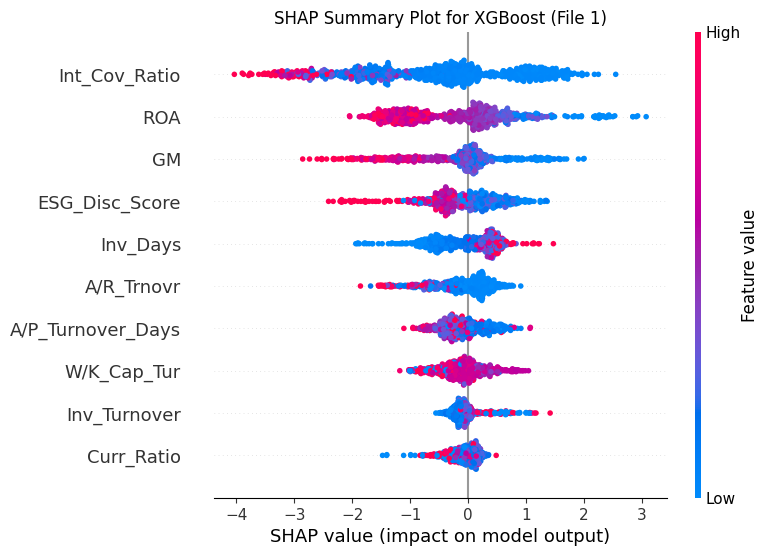

--- Running SHAP analysis for File 2 ---
Displaying SHAP Summary Plot (Beeswarm)...


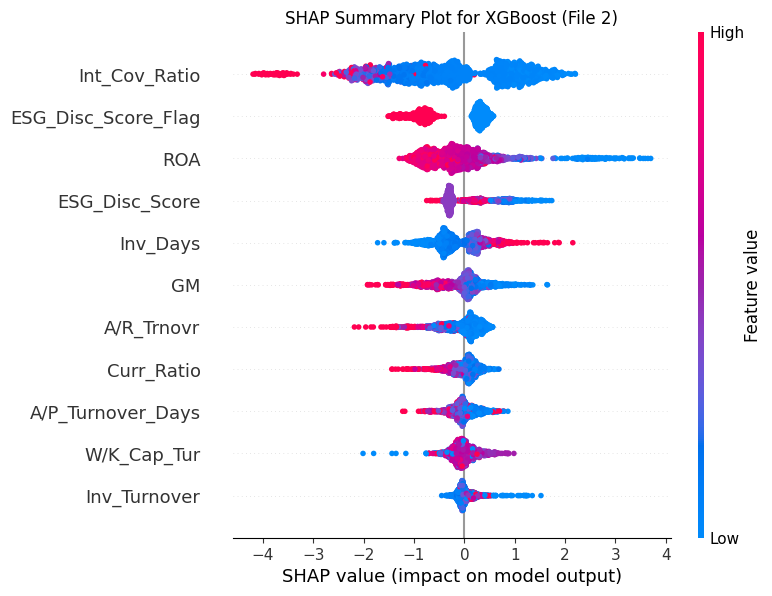

In [ ]:
print("\n================ STEP 3: MODEL EXPLANATION WITH SHAP =================\n")

def run_shap_analysis(best_models, X_test, file_name):
    """
    This function performs SHAP analysis on the best tree-based model.
    """
    print(f"--- Running SHAP analysis for {file_name} ---")

    # Let's choose XGBoost for SHAP analysis
    best_tree_model = best_models["XGBoost"]

    # Create a SHAP explainer
    explainer = shap.TreeExplainer(best_tree_model)

    # Calculate SHAP values for the test set
    shap_values = explainer.shap_values(X_test)

    print("Displaying SHAP Summary Plot (Beeswarm)...")
    shap.summary_plot(shap_values, X_test, plot_type="dot", show=False)
    plt.title(f"SHAP Summary Plot for XGBoost ({file_name})")
    plt.show()

# Run SHAP analysis for both files
run_shap_analysis(best_models1, X1_test, "File 1")
run_shap_analysis(best_models2, X2_test, "File 2")


================ STEP 3: MODEL EXPLANATION WITH SHAP =================

--- Running SHAP analysis for File 1 ---
Displaying SHAP Summary Plot (Beeswarm)...


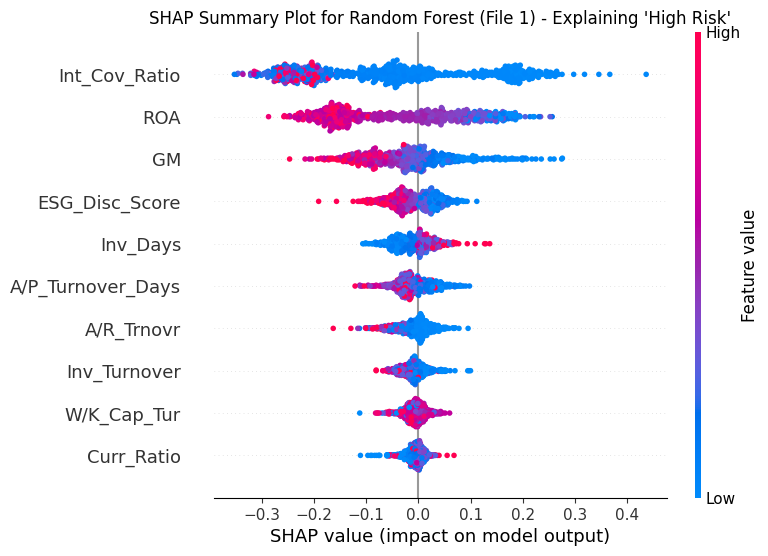

--- Running SHAP analysis for File 2 ---
Displaying SHAP Summary Plot (Beeswarm)...


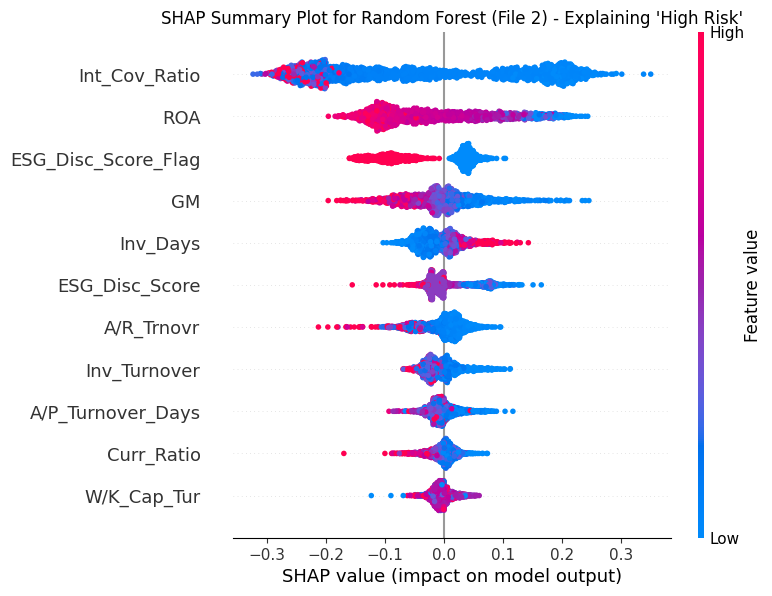

In [ ]:
print("\n================ STEP 3: MODEL EXPLANATION WITH SHAP =================\n")

def run_shap_analysis(best_models, X_test, file_name):
    """
    This function performs SHAP analysis on the best tree-based model.
    """
    print(f"--- Running SHAP analysis for {file_name} ---")

    # Let's choose Random Forest for SHAP analysis as it was the best performer
    best_tree_model = best_models["Random Forest"]

    # --- FIX: Use the modern, unified shap.Explainer API for robustness ---
    explainer = shap.Explainer(best_tree_model)

    # Calculate the SHAP explanation object for the test set
    shap_explanation = explainer(X_test)

    print("Displaying SHAP Summary Plot (Beeswarm)...")
    # For binary classification, we want to explain the 'High Risk' class (class 1)
    # The new explanation object stores values in a multi-dimensional array
    # We select the values for the positive class (index 1) for plotting
    shap.summary_plot(shap_explanation.values[:,:,1], X_test, plot_type="dot", show=False)
    plt.title(f"SHAP Summary Plot for Random Forest ({file_name}) - Explaining 'High Risk'")
    plt.show()

# Run SHAP analysis for both files
run_shap_analysis(best_models1, X1_test, "File 1")
run_shap_analysis(best_models2, X2_test, "File 2")